In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from astropy.io import fits
from astropy.table import Table
from scipy.stats.stats import pearsonr
pd.set_option('display.max_columns', None)

In [182]:
#load in galaxies with R<24
#make dataframes with magnitudes, errors, metadata, etc all separate 

In [183]:
#read the fits file into a pandas dataframe and preview the format
dat = Table.read('combo17.fits', format='fits')
df = dat.to_pandas()
df = df.set_index('Seq')
df

ra        dec            x            y       Rmag  e_Rmag  \
Seq                                                                          
1.0      53.046553 -28.064824  4746.474609     1.571371  25.897972  0.2597   
2.0      52.939626 -28.064628  6174.167969     1.473535  25.922817  0.1994   
3.0      53.252145 -28.065104  2001.235474     1.542392  26.080927  0.2214   
4.0      53.367958 -28.065178   456.566406     1.895396  24.873579  0.1563   
5.0      53.321063 -28.065133  1081.781860     2.049523  25.784210  0.2698   
6.0      53.292097 -28.065128  1468.137451     1.760503  24.995020  0.0972   
7.0      53.229968 -28.065030  2297.236084     2.312128  25.871485  0.2882   
8.0      53.182939 -28.065017  2925.088135     1.681132  25.731575  0.1831   
9.0      52.939153 -28.064589  6180.487305     2.052985  25.013447  0.1807   
10.0     52.841146 -28.064385  7488.088379     1.784866  25.764791  0.1569   
11.0     53.380737 -28.065146   286.257935     2.505876  26.099646  0.2336   
12.0     53.381187 -28.065126   280.263397     2.800794  25.978592  0.2829   
13.0     53.039628 -28.064807  4838.958008     1.653307  26.166065  0.2965   
14.0     53.389145 -28.065155   174.228546     2.448303  25.019098  0.1043   
15.0     53.381608 -28.065153   274.654205     2.403809  25.715055  0.2099   
16.0     53.332906 -28.065159   923.849243     1.804613  24.245756  0.0540   
17.0     53.319178 -28.065094  1106.910156     2.630254  26.167065  0.2576   
18.0     53.289148 -28.065077  1507.489502     2.486129  24.866901  0.1161   
19.0     53.253855 -28.065074  1978.412109     2.031571  25.419298  0.1999   
20.0     53.222222 -28.065006  2400.628906     2.553832  26.028385  0.2478   
21.0     52.825312 -28.064275  7699.214355     2.852468  25.203150  0.1280   
22.0     53.319857 -28.064944  1097.855835     4.892915  26.007462  0.2868   
23.0     53.000599 -28.064719  5360.147461     1.927709  25.895369  0.2568   
24.0     53.252571 -28.065025  1995.551758     2.748734  25.581200  0.2119   
25.0     53.251260 -28.065021  2013.049561     2.794126  25.262024  0.2668   
26.0     53.396649 -28.065168    74.251678     2.318923  25.504370  0.1117   
27.0     53.391790 -28.065157   138.984848     2.443302  23.979492  0.0600   
28.0     53.390310 -28.065145   158.710480     2.605507  23.980591  0.0639   
29.0     53.388043 -28.065162   188.917633     2.329053  23.740246  0.0562   
30.0     53.384214 -28.065148   239.929428     2.502542  24.050272  0.0793   
...            ...        ...          ...          ...        ...     ...   
63472.0  53.113613 -27.569229  3863.798096  7500.508789  24.167282  0.1003   
63473.0  53.342643 -27.567630   793.349182  7525.370117  25.643385  0.1930   
63474.0  53.066560 -27.569104  4494.945312  7501.340332  25.958883  0.2302   
63475.0  53.086804 -27.570271  4223.369629  7484.197266  23.641243  0.0474   
63476.0  53.263196 -27.571967  1857.784912  7460.412109  24.353809  0.0668   
63477.0  52.894785 -27.572268  6797.937012  7447.029297  25.176601  0.2727   
63478.0  52.945570 -27.570964  6117.374023  7469.092285  24.273888  0.0917   
63479.0  53.087162 -27.569812  4218.580078  7491.139160  21.777994  0.0090   
63480.0  53.203818 -27.566827  2654.000732  7537.937012  23.306425  0.0374   
63481.0  53.387551 -27.570865   192.032730  7475.819824  25.837656  0.2395   
63482.0  53.084909 -27.571873  4248.739746  7459.933105  25.584703  0.2428   
63483.0  52.990949 -27.568821  5509.037598  7503.281250  25.985203  0.2417   
63484.0  53.386864 -27.572423   201.203384  7452.302246  25.526834  0.1618   
63485.0  53.172772 -27.570439  3070.260498  7483.092773  24.738199  0.1261   
63486.0  52.908957 -27.569236  6608.176758  7493.550781  26.642208  0.2919   
63487.0  53.072679 -27.569239  4412.869629  7499.454102  24.190502  0.1343   
63488.0  53.133049 -27.570516  3603.054443  7481.386719  23.297182  0.0355   
63489.0  53.284064 -27.568011  1578.165894  7520.117676  25.161890  0.2102   
63490.0  53.210191 -27.572089  2568.41

In [184]:
#look at the summary of the data
df.describe()

ra           dec             x             y          Rmag  \
count  63501.000000  63501.000000  63501.000000  63501.000000  63501.000000   
mean      53.104001    -27.813953   3986.033203   3796.602051     24.562199   
std        0.171693      0.146023   2297.666504   2209.061523      1.406477   
min       52.807881    -28.065178      1.479434      1.473535     10.765173   
25%       52.955231    -27.941551   1965.014404   1865.999268     23.982468   
50%       53.100140    -27.812306   4035.764893   3822.062988     24.884777   
75%       53.254966    -27.687460   5978.214355   5709.890625     25.510330   
max       53.402072    -27.564524   7935.949707   7564.394531     27.456657   

             e_Rmag       Ap_Rmag      ApD_Rmag        mu_max       MajAxis  \
count  63501.000000  63119.000000  63119.000000  63501.000000  62849.000000   
mean       0.153147     24.631195     -0.118906     24.579674      1.393322   
std        0.088606      1.196347      0.538039      1.066895      2.059586   
min        0.000000     15.835526    -14.357697     15.725052      0.707107   
25%        0.077100     24.193659     -0.331580     24.336487      1.104485   
50%        0.151300     24.909418     -0.048733     24.901968      1.258277   
75%        0.229500     25.353374      0.188632     25.204523      1.487071   
max        0.312300     32.502773      5.100368     26.165743    410.240570   

            MinAxis            PA     phot_flag      var_flag    stellarity  \
count  62849.000000  63145.000000  63501.000000  63501.000000  62027.000000   
mean       1.060933      4.661008     11.145226      0.005323      0.409679   
std        0.762866      0.918871     77.207660      0.099937      0.378644   
min        0.707107      0.000000      0.000000      0.000000      0.000000   
25%        0.932873      3.857174      0.000000      0.000000      0.000000   
50%        1.048810      4.712385      0.000000      0.000000      0.414000   
75%        1.156956      5.445423      2.000000      0.000000      0.741000   
max      156.921432      6.283180   2048.000000      5.000000      0.999000   

               MC_z        e_MC_z         MC_z2       e_MC_z2       MC_z_ml  \
count  62337.000000  62337.000000  30009.000000  30009.000000  62448.000000   
mean       0.914203      0.216719      1.528243      0.252378      1.278505   
std        0.380773      0.194352      0.338335      0.115247      0.668158   
min        0.000562      0.000000      0.000000      0.000000      0.000000   
25%        0.746069      0.062166      1.365741      0.168895      0.705174   
50%        0.949429      0.117023      1.612132      0.242936      1.592494   
75%        1.101874      0.365460      1.720051      0.316193      1.821895   
max        4.655534      1.126100      3.598719      0.869940      4.648317   

                 dl       chi2red         UjMag       e_UjMag         BjMag  \
count  62337.000000  63501.000000  58109.000000  58109.000000  55790.000000   
mean    4261.277344      2.215335    -17.856542      0.647996    -17.613107   
std     2083.167480      3.455734      1.705067     21.351854      1.857075   
min        1.799523      0.003740    -31.328515      0.100043    -31.395583   
25%     3224.040771      1.175846    -18.849311      0.148175    -18.772400   
50%     4337.952148      1.776739    -18.065259      0.227997    -17.850908   
75%     5214.775391      2.650852    -17.301368      0.327867    -16.810366   
max    30031.947266     99.000000     -3.643033   4048.951416     -4.801158   

            e_BjMag         VjMag       e_VjMag         usMag       e_usMag  \
count  55790.000000  55494.000000  55494.000000  58093.000000  58093.000000   
mean       1.446785    -17.950508      1.575676    -18.008066      0.649675   
std       34.071824      1.918606     36.521658      1.703622     21.355223   
min        0.100037    -32.055682      0.100006    -31.461969      0.100043   
25%        0.180255    -19.130679      0.201639    -18.998867 

In [185]:
#filter to include only galaxies and objects with Rmag <= 24
gal = df['MC_class'].value_counts().idxmax()
galaxies = df[(df['MC_class'] == gal) & (df['Rmag'] <= 24)]
galaxies.describe()

ra           dec             x             y          Rmag  \
count  14543.000000  14543.000000  14543.000000  14543.000000  14543.000000   
mean      53.103380    -27.812469   3994.373535   3819.087646     22.883251   
std        0.168927      0.144130   2260.789307   2180.417969      1.104913   
min       52.808251    -28.065162      2.755915      2.329053     10.765173   
25%       52.959428    -27.940487   2030.808899   1882.120911     22.437507   
50%       53.099065    -27.807462   4049.890625   3893.441162     23.224573   
75%       53.250206    -27.689966   5922.895020   5670.535645     23.682796   
max       53.401990    -27.564573   7933.781250   7562.461914     23.999872   

             e_Rmag       Ap_Rmag      ApD_Rmag        mu_max       MajAxis  \
count  14543.000000  14537.000000  14537.000000  14543.000000  14453.000000   
mean       0.044792     23.314270     -0.489585     23.554790      1.385101   
std        0.026523      1.009200      0.552942      0.950258      0.335585   
min        0.000000     17.549747    -14.357697     17.722456      0.707107   
25%        0.023900     22.852430     -0.655252     23.136932      1.179223   
50%        0.043100     23.531912     -0.367760     23.749092      1.312957   
75%        0.061800     23.934141     -0.172392     24.173920      1.508231   
max        0.162300     28.546457      0.774403     25.947252      7.842919   

            MinAxis            PA     phot_flag      var_flag    stellarity  \
count  14453.000000  14471.000000  14543.000000  14543.000000  14417.000000   
mean       1.148701      4.709470      6.422471      0.008045      0.205684   
std        0.136685      0.913958     75.190707      0.102257      0.379838   
min        0.707107      0.000000      0.000000      0.000000      0.000000   
25%        1.061069      3.892081      0.000000      0.000000      0.000000   
50%        1.126621      4.764745      2.000000      0.000000      0.000000   
75%        1.216459      5.515236      2.000000      0.000000      0.105000   
max        2.666865      6.283180   2048.000000      4.000000      0.999000   

               MC_z        e_MC_z        MC_z2      e_MC_z2       MC_z_ml  \
count  14539.000000  14539.000000  5003.000000  5003.000000  14543.000000   
mean       0.674519      0.097321     1.336076     0.222540      0.789231   
std        0.351316      0.126895     0.456077     0.127582      0.515840   
min        0.002813      0.000262     0.034329     0.001355      0.000000   
25%        0.407569      0.025627     1.062207     0.133836      0.417831   
50%        0.691580      0.047252     1.378428     0.202772      0.705174   
75%        0.898255      0.096169     1.681039     0.285226      1.010243   
max        2.547531      0.960147     2.609836     0.869940      2.883013   

                 dl       chi2red         UjMag       e_UjMag         BjMag  \
count  14539.000000  14543.000000  14349.000000  14349.000000  14350.000000   
mean    2976.277100      1.291188    -18.507990      0.148034    -18.462474   
std     1820.630737      0.873302      1.931641      0.586099      1.934460   
min        8.412499      0.129306    -31.328515      0.100072    -31.395583   
25%     1554.495056      0.818240    -19.741145      0.106641    -19.710269   
50%     2938.072754      1.138220    -18.992597      0.117913    -18.888755   
75%     4051.054565      1.563548    -17.759663      0.139710    -17.689226   
max    14608.092773     28.317553     -5.340054     65.264145     -5.250331   

            e_BjMag         VjMag       e_VjMag         usMag       e_usMag  \
count  14350.000000  14350.000000  14350.000000  14348.000000  14348.000000   
mean       0.201196    -18.866232      0.218364    -18.661119      0.149055   
std        1.243411      1.946698      1.003175      1.931452      0.595544   
min        0.100037    -32.055682      0.100006    -31.461969      0.100072   
25%        0.105258    -20.132087      0.109528    -19.890697      0.106693   
5

In [186]:
#see what the columns are
galaxies.head(10)

ra        dec            x         y       Rmag  e_Rmag  \
Seq                                                                     
27.0   53.391790 -28.065157   138.984848  2.443302  23.979492  0.0600   
28.0   53.390310 -28.065145   158.710480  2.605507  23.980591  0.0639   
29.0   53.388043 -28.065162   188.917633  2.329053  23.740246  0.0562   
44.0   53.393059 -28.065151   122.084007  2.535239  23.922256  0.0545   
71.0   53.282935 -28.064982  1590.376953  3.842879  23.596121  0.0464   
72.0   53.086306 -28.064762  4215.562988  3.483208  23.204165  0.0318   
83.0   52.928422 -28.064465  6323.718750  3.579376  22.883890  0.0263   
93.0   53.014885 -28.064476  5169.390625  5.983982  23.874487  0.0549   
104.0  52.852962 -28.064342  7330.512695  2.864265  22.933117  0.0205   
120.0  53.378419 -28.064978   317.143646  5.010882  23.099501  0.0449   

         Ap_Rmag  ApD_Rmag     mu_max  MajAxis  MinAxis  PA  phot_flag  \
Seq                                                                      
27.0         NaN       NaN  24.936993      NaN      NaN NaN       27.0   
28.0   26.790945 -2.868736  24.673790      NaN      NaN NaN       27.0   
29.0   25.318111 -1.636248  24.608646      NaN      NaN NaN       27.0   
44.0         NaN       NaN  24.868057      NaN      NaN NaN       27.0   
71.0   23.622013 -0.084274  23.884521      NaN      NaN NaN       24.0   
72.0   23.172235 -0.026453  23.517265      NaN      NaN NaN       24.0   
83.0   22.922358 -0.096849  23.226791      NaN      NaN NaN       26.0   
93.0   23.719187  0.096918  23.536787      NaN      NaN NaN       16.0   
104.0  22.692135  0.182600  22.613617      NaN      NaN NaN       24.0   
120.0  23.646997 -0.605879  24.233702      NaN      NaN NaN       24.0   

       var_flag  stellarity            MC_class      MC_z    e_MC_z     MC_z2  \
Seq                                                                             
27.0        0.0         NaN  b'Galaxy         '  1.829976  0.033821       NaN   
28.0        0.0         NaN  b'Galaxy         '  1.530428  0.344236       NaN   
29.0        0.0         NaN  b'Galaxy         '  0.870229  0.095103  1.657495   
44.0        0.0         NaN  b'Galaxy         '  1.820202  0.063182       NaN   
71.0        0.0         NaN  b'Galaxy         '  0.642983  0.044278  1.059768   
72.0        0.0         NaN  b'Galaxy         '  1.888432  0.038046  1.149597   
83.0        0.0         NaN  b'Galaxy         '  0.829822  0.026309       NaN   
93.0        0.0         NaN  b'Galaxy         '  0.105104  0.061125  1.400360   
104.0       0.0         NaN  b'Galaxy         '  0.036222  0.021235  0.446200   
120.0       0.0         NaN  b'Galaxy         '  0.814773  0.036966  1.303843   

        e_MC_z2   MC_z_ml            dl    chi2red      UjMag   e_UjMag  \
Seq                                                                       
27.0        NaN  1.836004   9754.382812   7.326249        NaN       NaN   
28.0        NaN  1.592494   7827.839844   4.505901 -20.369415  3.334810   
29.0   0.301778  1.579596   3895.825684   1.217427 -19.150250  0.160315   
44.0        NaN  1.836004   9690.364258  15.495697        NaN       NaN   
71.0   0.200652  0.679850   2688.094971   1.277434 -17.913065  0.113077   
72.0   0.105516  1.922155  10137.973633   1.879897        NaN       NaN   
83.0        NaN  0.846824   3674.194092   0.453354 -19.849175  0.104143   
93.0   0.627963  0.138460    339.799866   1.370022 -12.193742  0.169750   
104.0  0.128239  0.396774    111.532974   1.705127 -10.174512  0.112446   
120.0  0.110215  1.358102   3592.522949   0.895390 -19.589496  0.111572   

           BjMag   e_BjMag      VjMag   e_VjMag      usMag   e_usMag  \
Seq                                                                    
27.0         NaN       NaN        NaN       NaN        NaN       NaN   
28.0  -20.828274  3.334810 -21.658553  3.334810 -20.512117  3.334810   
29.0  -18.206184  1.367350 -18.623569  1.367350 -19.282882  0.160315   
44.0         N

In [187]:
#remove unnecessary columns
galaxies=galaxies.drop(columns=['MajAxis','MinAxis','PA','phot_flag','var_flag','stellarity','MC_z2','dl','S145Mag','e_S145Mag'])
galaxies

ra        dec            x            y       Rmag  e_Rmag  \
Seq                                                                          
27.0     53.391790 -28.065157   138.984848     2.443302  23.979492  0.0600   
28.0     53.390310 -28.065145   158.710480     2.605507  23.980591  0.0639   
29.0     53.388043 -28.065162   188.917633     2.329053  23.740246  0.0562   
44.0     53.393059 -28.065151   122.084007     2.535239  23.922256  0.0545   
71.0     53.282935 -28.064982  1590.376953     3.842879  23.596121  0.0464   
72.0     53.086306 -28.064762  4215.562988     3.483208  23.204165  0.0318   
83.0     52.928422 -28.064465  6323.718750     3.579376  22.883890  0.0263   
93.0     53.014885 -28.064476  5169.390625     5.983982  23.874487  0.0549   
104.0    52.852962 -28.064342  7330.512695     2.864265  22.933117  0.0205   
120.0    53.378419 -28.064978   317.143646     5.010882  23.099501  0.0449   
121.0    53.197003 -28.064957  2737.303711     2.840287  22.009174  0.0186   
122.0    53.038740 -28.064493  4850.823730     6.363913  22.350588  0.0197   
124.0    52.877350 -28.064250  7005.218750     5.116796  22.729013  0.0227   
125.0    52.837197 -28.064160  7540.751953     5.027295  23.378035  0.0444   
126.0    53.216590 -28.064546  2475.818359     9.402079  23.342981  0.0349   
139.0    52.835385 -28.064069  7564.919922     6.341602  23.803795  0.0604   
153.0    53.382715 -28.064901   259.894073     6.226456  23.468828  0.0649   
162.0    53.116444 -28.064557  3813.067139     7.274312  23.443321  0.0410   
182.0    52.940801 -28.063833  6158.533691    13.531056  23.686937  0.0640   
183.0    53.129483 -28.064022  3638.936768    15.638693  23.276030  0.0341   
185.0    53.013757 -28.063624  5184.491699    18.826496  23.860867  0.0562   
192.0    53.400950 -28.064558    16.950436    11.563441  23.669029  0.0563   
196.0    53.311429 -28.064669  1210.260864     8.954574  22.655312  0.0255   
197.0    52.897597 -28.063792  6735.121582    12.730290  23.523581  0.0416   
198.0    53.075191 -28.064040  4364.025391    14.134483  23.142244  0.0405   
207.0    53.269241 -28.064780  1773.089844     6.703325  23.244696  0.0595   
215.0    53.053105 -28.063773  4659.003906    17.627720  20.862370  0.0025   
217.0    53.212253 -28.064758  2533.719238     6.129774  22.946413  0.0864   
218.0    52.946793 -28.064113  6078.537598     9.479783  22.821920  0.0299   
219.0    53.394486 -28.064357   103.051292    14.546599  23.896990  0.0522   
...            ...        ...          ...          ...        ...     ...   
63347.0  53.209903 -27.579364  2572.098145  7348.504395  23.758965  0.0627   
63351.0  53.067008 -27.573478  4488.793945  7435.230957  23.700565  0.0697   
63356.0  53.168925 -27.573149  3121.781494  7442.088379  23.077789  0.0339   
63359.0  53.085426 -27.572587  4241.781738  7449.146973  22.128281  0.0148   
63377.0  52.950838 -27.571020  6046.752441  7468.470703  23.727745  0.0518   
63379.0  52.873430 -27.571789  7084.058594  7453.155762  22.142475  0.0193   
63380.0  53.355181 -27.573840   625.350037  7431.411621  23.135599  0.0300   
63384.0  53.073312 -27.565500  4404.495605  7555.991211  23.847136  0.0868   
63387.0  53.379873 -27.573384   294.770172  7437.916504  23.796534  0.0510   
63391.0  52.984391 -27.570968  5596.890625  7470.587891  23.606901  0.0545   
63396.0  53.055231 -27.567987  4646.941406  7517.928711  21.566763  0.0116   
63399.0  52.827432 -27.571502  7700.058594  7454.899414  21.462069  0.0099   
63414.0  53.269188 -27.572098  1777.469238  7458.428223  23.488401  0.0458   
63416.0  53.145770 -27.572208  3432.377930  7456.016602  23.230715  0.0408   
63422.0  52.872981 -27.571227  7090.101074  7461.625488  23.658243  0.0497   
63431.0  53.174668 -27.573327  3044.760742  7439.466309  23.103090  0.0407   
63435.0  53.357210 -27.569762   598.237366  7492.979492  23.913155  0.0704   
63441.0  53.215975 -27.570098  2490.900391  7488.575684  23.237989  0.0391   
63443.0  53.255802 -27.568077  1956.97

In [188]:
#filter out objects that have a lot of NaN or 0.0s in in the mags
galaxies = galaxies.dropna(subset=['UjMag','BjMag','VjMag','usMag','gsMag','rsMag'])
galaxies.describe()

ra           dec             x             y          Rmag  \
count  14348.000000  14348.000000  14348.000000  14348.000000  14348.000000   
mean      53.103324    -27.812343   3995.124512   3820.998535     22.877937   
std        0.168692      0.143993   2257.649902   2178.364990      1.106377   
min       52.808610    -28.065162      2.755915      2.329053     10.765173   
25%       52.959535    -27.940171   2036.440063   1884.475342     22.423131   
50%       53.099205    -27.807339   4048.033691   3896.102783     23.218521   
75%       53.249589    -27.690054   5922.815186   5670.235352     23.680739   
max       53.401884    -27.564573   7929.382812   7562.461914     23.999872   

             e_Rmag       Ap_Rmag      ApD_Rmag        mu_max          MC_z  \
count  14348.000000  14348.000000  14348.000000  14348.000000  14348.000000   
mean       0.044657     23.301811     -0.482163     23.553150      0.659962   
std        0.026454      0.997941      0.517260      0.942019      0.328733   
min        0.000000     17.549747    -14.357697     17.722456      0.002813   
25%        0.023800     22.843041     -0.654005     23.133982      0.403142   
50%        0.043000     23.525417     -0.368564     23.747563      0.686684   
75%        0.061600     23.929568     -0.173879     24.171418      0.886320   
max        0.162300     27.370026      0.774403     25.797379      1.599780   

             e_MC_z      e_MC_z2       MC_z_ml       chi2red         UjMag  \
count  14348.000000  4898.000000  14348.000000  14348.000000  14348.000000   
mean       0.096930     0.221830      0.776659      1.270200    -18.508216   
std        0.127159     0.126890      0.505662      0.704140      1.931519   
min        0.000262     0.001355      0.000000      0.129306    -31.328515   
25%        0.025435     0.133823      0.417831      0.817178    -19.741251   
50%        0.046814     0.202441      0.705174      1.134830    -18.992667   
75%        0.095204     0.284398      0.980389      1.556011    -17.759836   
max        0.960147     0.869940      2.883013     13.657068     -5.340054   

            e_UjMag         BjMag       e_BjMag         VjMag       e_VjMag  \
count  14348.000000  14348.000000  14348.000000  14348.000000  14348.000000   
mean       0.148030    -18.462862      0.201202    -18.866585      0.218379   
std        0.586119      1.934316      1.243497      1.946602      1.003244   
min        0.100072    -31.395583      0.100037    -32.055682      0.100006   
25%        0.106641    -19.710539      0.105257    -20.132464      0.109538   
50%        0.117913    -18.889189      0.120887    -19.230760      0.138096   
75%        0.139707    -17.689347      0.172730    -18.014014      0.212163   
max       65.264145     -5.250331     88.907875     -5.834827     86.272079   

              usMag       e_usMag         gsMag       e_gsMag         rsMag  \
count  14348.000000  14348.000000  14348.000000  14348.000000  14348.000000   
mean     -18.661119      0.149055    -18.578387      0.210947    -19.157036   
std        1.931452      0.595544      1.921861      1.002485      1.955514   
min      -31.461969      0.100072    -31.761922      0.100006    -32.328855   
25%      -19.890697      0.106693    -19.827745      0.106646    -20.430393   
50%      -19.145921      0.117980    -18.985780      0.129146    -19.495721   
75%      -17.912573      0.140017    -17.768367      0.201994    -18.292242   
max       -5.520545     65.264145     -5.582446     86.272079     -6.235617   

            e_rsMag    UbMag  e_UbMag    BbMag  e_BbMag    VbMag  e_VbMag  \
count  14348.000000  14348.0  14348.0  14348.0  14348.0  14348.0  14348.0   
mean       0.224044      0.0      0.0      0.0      0.0      0.0      0.0   
std        1.004092      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.100006      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.112032      0.0      0.0      0.0      0.0      0.0      0.0   
50% 

In [189]:
#preview the dataframe to figure out what else to remove
galaxies

ra        dec            x            y       Rmag  e_Rmag  \
Seq                                                                          
28.0     53.390310 -28.065145   158.710480     2.605507  23.980591  0.0639   
29.0     53.388043 -28.065162   188.917633     2.329053  23.740246  0.0562   
71.0     53.282935 -28.064982  1590.376953     3.842879  23.596121  0.0464   
83.0     52.928422 -28.064465  6323.718750     3.579376  22.883890  0.0263   
93.0     53.014885 -28.064476  5169.390625     5.983982  23.874487  0.0549   
104.0    52.852962 -28.064342  7330.512695     2.864265  22.933117  0.0205   
120.0    53.378419 -28.064978   317.143646     5.010882  23.099501  0.0449   
121.0    53.197003 -28.064957  2737.303711     2.840287  22.009174  0.0186   
122.0    53.038740 -28.064493  4850.823730     6.363913  22.350588  0.0197   
124.0    52.877350 -28.064250  7005.218750     5.116796  22.729013  0.0227   
125.0    52.837197 -28.064160  7540.751953     5.027295  23.378035  0.0444   
126.0    53.216590 -28.064546  2475.818359     9.402079  23.342981  0.0349   
139.0    52.835385 -28.064069  7564.919922     6.341602  23.803795  0.0604   
153.0    53.382715 -28.064901   259.894073     6.226456  23.468828  0.0649   
162.0    53.116444 -28.064557  3813.067139     7.274312  23.443321  0.0410   
182.0    52.940801 -28.063833  6158.533691    13.531056  23.686937  0.0640   
183.0    53.129483 -28.064022  3638.936768    15.638693  23.276030  0.0341   
185.0    53.013757 -28.063624  5184.491699    18.826496  23.860867  0.0562   
192.0    53.400950 -28.064558    16.950436    11.563441  23.669029  0.0563   
196.0    53.311429 -28.064669  1210.260864     8.954574  22.655312  0.0255   
197.0    52.897597 -28.063792  6735.121582    12.730290  23.523581  0.0416   
198.0    53.075191 -28.064040  4364.025391    14.134483  23.142244  0.0405   
207.0    53.269241 -28.064780  1773.089844     6.703325  23.244696  0.0595   
215.0    53.053105 -28.063773  4659.003906    17.627720  20.862370  0.0025   
218.0    52.946793 -28.064113  6078.537598     9.479783  22.821920  0.0299   
219.0    53.394486 -28.064357   103.051292    14.546599  23.896990  0.0522   
220.0    52.857718 -28.063539  7267.143066    15.171440  22.884827  0.0293   
224.0    53.066655 -28.063578  4478.050293    20.912207  22.746115  0.0165   
237.0    53.262811 -28.064414  1858.901733    12.130710  23.900452  0.0972   
239.0    53.134542 -28.063679  3571.382324    20.942469  23.692974  0.0688   
...            ...        ...          ...          ...        ...     ...   
63347.0  53.209903 -27.579364  2572.098145  7348.504395  23.758965  0.0627   
63351.0  53.067008 -27.573478  4488.793945  7435.230957  23.700565  0.0697   
63356.0  53.168925 -27.573149  3121.781494  7442.088379  23.077789  0.0339   
63359.0  53.085426 -27.572587  4241.781738  7449.146973  22.128281  0.0148   
63377.0  52.950838 -27.571020  6046.752441  7468.470703  23.727745  0.0518   
63379.0  52.873430 -27.571789  7084.058594  7453.155762  22.142475  0.0193   
63380.0  53.355181 -27.573840   625.350037  7431.411621  23.135599  0.0300   
63384.0  53.073312 -27.565500  4404.495605  7555.991211  23.847136  0.0868   
63387.0  53.379873 -27.573384   294.770172  7437.916504  23.796534  0.0510   
63391.0  52.984391 -27.570968  5596.890625  7470.587891  23.606901  0.0545   
63396.0  53.055231 -27.567987  4646.941406  7517.928711  21.566763  0.0116   
63399.0  52.827432 -27.571502  7700.058594  7454.899414  21.462069  0.0099   
63414.0  53.269188 -27.572098  1777.469238  7458.428223  23.488401  0.0458   
63416.0  53.145770 -27.572208  3432.377930  7456.016602  23.230715  0.0408   
63422.0  52.872981 -27.571227  7090.101074  7461.625488  23.658243  0.0497   
63431.0  53.174668 -27.573327  3044.760742  7439.466309  23.103090  0.0407   
63435.0  53.357210 -27.569762   598.237366  7492.979492  23.913155  0.0704   
63441.0  53.215975 -27.570098  2490.900391  7488.575684  23.237989  0.0391   
63443.0  53.255802 -27.568077  1956.97

In [190]:
#remove more unnecessary columns - all equal zero
galaxies=galaxies.drop(columns=['UbMag','e_UbMag','BbMag','e_BbMag','VbMag','e_VbMag','e_MC_z2'])
galaxies

ra        dec            x            y       Rmag  e_Rmag  \
Seq                                                                          
28.0     53.390310 -28.065145   158.710480     2.605507  23.980591  0.0639   
29.0     53.388043 -28.065162   188.917633     2.329053  23.740246  0.0562   
71.0     53.282935 -28.064982  1590.376953     3.842879  23.596121  0.0464   
83.0     52.928422 -28.064465  6323.718750     3.579376  22.883890  0.0263   
93.0     53.014885 -28.064476  5169.390625     5.983982  23.874487  0.0549   
104.0    52.852962 -28.064342  7330.512695     2.864265  22.933117  0.0205   
120.0    53.378419 -28.064978   317.143646     5.010882  23.099501  0.0449   
121.0    53.197003 -28.064957  2737.303711     2.840287  22.009174  0.0186   
122.0    53.038740 -28.064493  4850.823730     6.363913  22.350588  0.0197   
124.0    52.877350 -28.064250  7005.218750     5.116796  22.729013  0.0227   
125.0    52.837197 -28.064160  7540.751953     5.027295  23.378035  0.0444   
126.0    53.216590 -28.064546  2475.818359     9.402079  23.342981  0.0349   
139.0    52.835385 -28.064069  7564.919922     6.341602  23.803795  0.0604   
153.0    53.382715 -28.064901   259.894073     6.226456  23.468828  0.0649   
162.0    53.116444 -28.064557  3813.067139     7.274312  23.443321  0.0410   
182.0    52.940801 -28.063833  6158.533691    13.531056  23.686937  0.0640   
183.0    53.129483 -28.064022  3638.936768    15.638693  23.276030  0.0341   
185.0    53.013757 -28.063624  5184.491699    18.826496  23.860867  0.0562   
192.0    53.400950 -28.064558    16.950436    11.563441  23.669029  0.0563   
196.0    53.311429 -28.064669  1210.260864     8.954574  22.655312  0.0255   
197.0    52.897597 -28.063792  6735.121582    12.730290  23.523581  0.0416   
198.0    53.075191 -28.064040  4364.025391    14.134483  23.142244  0.0405   
207.0    53.269241 -28.064780  1773.089844     6.703325  23.244696  0.0595   
215.0    53.053105 -28.063773  4659.003906    17.627720  20.862370  0.0025   
218.0    52.946793 -28.064113  6078.537598     9.479783  22.821920  0.0299   
219.0    53.394486 -28.064357   103.051292    14.546599  23.896990  0.0522   
220.0    52.857718 -28.063539  7267.143066    15.171440  22.884827  0.0293   
224.0    53.066655 -28.063578  4478.050293    20.912207  22.746115  0.0165   
237.0    53.262811 -28.064414  1858.901733    12.130710  23.900452  0.0972   
239.0    53.134542 -28.063679  3571.382324    20.942469  23.692974  0.0688   
...            ...        ...          ...          ...        ...     ...   
63347.0  53.209903 -27.579364  2572.098145  7348.504395  23.758965  0.0627   
63351.0  53.067008 -27.573478  4488.793945  7435.230957  23.700565  0.0697   
63356.0  53.168925 -27.573149  3121.781494  7442.088379  23.077789  0.0339   
63359.0  53.085426 -27.572587  4241.781738  7449.146973  22.128281  0.0148   
63377.0  52.950838 -27.571020  6046.752441  7468.470703  23.727745  0.0518   
63379.0  52.873430 -27.571789  7084.058594  7453.155762  22.142475  0.0193   
63380.0  53.355181 -27.573840   625.350037  7431.411621  23.135599  0.0300   
63384.0  53.073312 -27.565500  4404.495605  7555.991211  23.847136  0.0868   
63387.0  53.379873 -27.573384   294.770172  7437.916504  23.796534  0.0510   
63391.0  52.984391 -27.570968  5596.890625  7470.587891  23.606901  0.0545   
63396.0  53.055231 -27.567987  4646.941406  7517.928711  21.566763  0.0116   
63399.0  52.827432 -27.571502  7700.058594  7454.899414  21.462069  0.0099   
63414.0  53.269188 -27.572098  1777.469238  7458.428223  23.488401  0.0458   
63416.0  53.145770 -27.572208  3432.377930  7456.016602  23.230715  0.0408   
63422.0  52.872981 -27.571227  7090.101074  7461.625488  23.658243  0.0497   
63431.0  53.174668 -27.573327  3044.760742  7439.466309  23.103090  0.0407   
63435.0  53.357210 -27.569762   598.237366  7492.979492  23.913155  0.0704   
63441.0  53.215975 -27.570098  2490.900391  7488.575684  23.237989  0.0391   
63443.0  53.255802 -27.568077  1956.97

In [191]:
#make separate dataframes
mags = pd.DataFrame([galaxies['Rmag'], galaxies['Ap_Rmag'],
                     galaxies['UjMag'],galaxies['BjMag'],galaxies['VjMag'],galaxies['usMag'],
                galaxies['gsMag'],galaxies['rsMag'],galaxies['S280Mag']])
mags = mags.transpose()
#mags

In [192]:
magsErr = pd.DataFrame([galaxies['e_Rmag'], galaxies['ApD_Rmag'],
                        galaxies['e_UjMag'],galaxies['e_BjMag'],galaxies['e_VjMag'],galaxies['e_usMag'],
                galaxies['e_gsMag'],galaxies['e_rsMag'],galaxies['e_S280Mag']])
magsErr = magsErr.transpose()
#magsErr

In [193]:
metadata = pd.DataFrame([galaxies['ra'],galaxies['dec'],galaxies['x'],galaxies['y'],
                galaxies['mu_max'],galaxies['MC_class'],galaxies['MC_z_ml']])
metadata = metadata.transpose()
#metadata

In [194]:
flux = pd.DataFrame([galaxies['W420F_E'],galaxies['W462F_E'],galaxies['W485F_D'],galaxies['W518F_E'],
                galaxies['W571F_D'],galaxies['W571F_E'],galaxies['W571F_S'],
                    galaxies['W604F_E'],galaxies['W646F_D'],galaxies['W696F_E'],
                    galaxies['W753F_E'],galaxies['W815F_E'],galaxies['W815F_G'],
                    galaxies['W815F_S'],galaxies['W856F_D'],galaxies['W914F_D'],
                     galaxies['W914F_E'],galaxies['UF_F'],galaxies['UF_G'],
                     galaxies['UF_S'],galaxies['BF_D'],galaxies['BF_F'],
                     galaxies['BF_S'],galaxies['VF_D'],galaxies['RF_D'],
                    galaxies['RF_E'],galaxies['RF_F'],galaxies['RF_G'],
                    galaxies['RF_S'],galaxies['IF_D']])
flux = flux.transpose()

In [195]:
fluxErr = pd.DataFrame([galaxies['e_W420F_E'],galaxies['e_W462F_E'],galaxies['e_W485F_D'],galaxies['e_W518F_E'],
                galaxies['e_W571F_D'],galaxies['e_W571F_E'],galaxies['e_W571F_S'],
                galaxies['e_W604F_E'],galaxies['e_W646F_D'],galaxies['e_W696F_E'],
                galaxies['e_W753F_E'],galaxies['e_W815F_E'],galaxies['e_W815F_G'],
                galaxies['e_W815F_S'],galaxies['e_W856F_D'],galaxies['e_W914F_D'],
                galaxies['e_W914F_E'],galaxies['e_UF_F'],galaxies['e_UF_G'],                  
                galaxies['e_UF_S'],galaxies['e_BF_D'],galaxies['e_BF_F'],
                galaxies['e_BF_S'],galaxies['e_VF_D'],galaxies['e_RF_D'],
                galaxies['e_RF_E'],galaxies['e_RF_F'],galaxies['e_RF_G'],
                galaxies['e_RF_S'],galaxies['e_IF_D']])
fluxErr = fluxErr.transpose()

In [196]:
#calculate fractional error too 
redshift = pd.DataFrame([galaxies['MC_z'], galaxies['e_MC_z'],
                     galaxies['chi2red'], galaxies['e_MC_z']/galaxies['MC_z']])
redshift = redshift.transpose()
redshift.columns = ['MC_z','e_MC_z','chi2red','e_Frac_z']
redshift

MC_z    e_MC_z   chi2red  e_Frac_z
Seq                                            
28.0     1.530428  0.344236  4.505901  0.224928
29.0     0.870229  0.095103  1.217427  0.109285
71.0     0.642983  0.044278  1.277434  0.068864
83.0     0.829822  0.026309  0.453354  0.031704
93.0     0.105104  0.061125  1.370022  0.581570
104.0    0.036222  0.021235  1.705127  0.586251
120.0    0.814773  0.036966  0.895390  0.045370
121.0    0.343430  0.027374  2.776546  0.079708
122.0    0.379379  0.011969  1.203183  0.031549
124.0    0.877019  0.027325  1.119769  0.031157
125.0    0.861432  0.035752  0.867447  0.041503
126.0    0.102080  0.122039  1.396768  1.195531
139.0    0.715313  0.093010  2.812134  0.130027
153.0    0.897435  0.248546  2.750201  0.276952
162.0    0.716499  0.169467  1.231519  0.236521
182.0    0.819445  0.043908  1.010537  0.053583
183.0    0.608103  0.017273  1.383891  0.028405
185.0    0.698103  0.033600  1.102099  0.048130
192.0    1.503987  0.464030  5.993363  0.308533
196.0    0.388819  0.007451  2.281220  0.019163
197.0    0.519826  0.511365  0.406929  0.983722
198.0    0.294708  0.074958  0.401987  0.254348
207.0    0.598889  0.424644  0.890175  0.709052
215.0    0.963932  0.086203  2.712852  0.089429
218.0    0.212640  0.009162  1.026249  0.043086
219.0    1.139763  0.182190  1.375379  0.159849
220.0    0.490034  0.029336  2.660161  0.059864
224.0    0.476659  0.023426  1.789555  0.049146
237.0    1.206303  0.503467  1.929445  0.417364
239.0    1.166358  0.051903  1.583124  0.044500
...           ...       ...       ...       ...
63347.0  0.961936  0.399793  1.017667  0.415613
63351.0  0.243765  0.027475  1.660781  0.112712
63356.0  0.194938  0.039658  0.805588  0.203437
63359.0  0.625338  0.011761  2.272451  0.018807
63377.0  0.152605  0.075801  0.887092  0.496718
63379.0  0.585386  0.054187  0.319074  0.092566
63380.0  0.503915  0.040848  0.891739  0.081061
63384.0  0.180034  0.134275  2.209095  0.745832
63387.0  0.204481  0.180760  2.173070  0.883996
63391.0  0.193391  0.080384  1.341978  0.415657
63396.0  0.446810  0.015825  1.460930  0.035418
63399.0  0.587924  0.031895  1.448437  0.054250
63414.0  0.136410  0.011691  1.079698  0.085708
63416.0  0.711364  0.032378  1.439834  0.045516
63422.0  0.099873  0.081691  0.632995  0.817949
63431.0  0.171414  0.032007  2.052746  0.186721
63435.0  0.847996  0.045093  1.494862  0.053176
63441.0  0.375025  0.026646  1.434680  0.071051
63443.0  1.263353  0.377027  0.404864  0.298434
63446.0  0.714984  0.045729  0.863518  0.063958
63447.0  0.731814  0.065558  0.657661  0.089583
63452.0  0.743717  0.024077  1.075529  0.032373
63468.0  1.235217  0.569558  0.773758  0.461100
63475.0  0.253399  0.277030  0.552024  1.093259
63480.0  1.171696  0.023423  1.470170  0.019991
63488.0  0.712463  0.018169  0.630332  0.025502
63490.0  0.757634  0.018757  1.289500  0.024757
63492.0  0.632843  0.083748  0.813616  0.132337
63494.0  0.491665  0.009428  1.109880  0.019175
63501.0  0.129147  0.010264  1.730416  0.079478

[14348 rows x 4 columns]

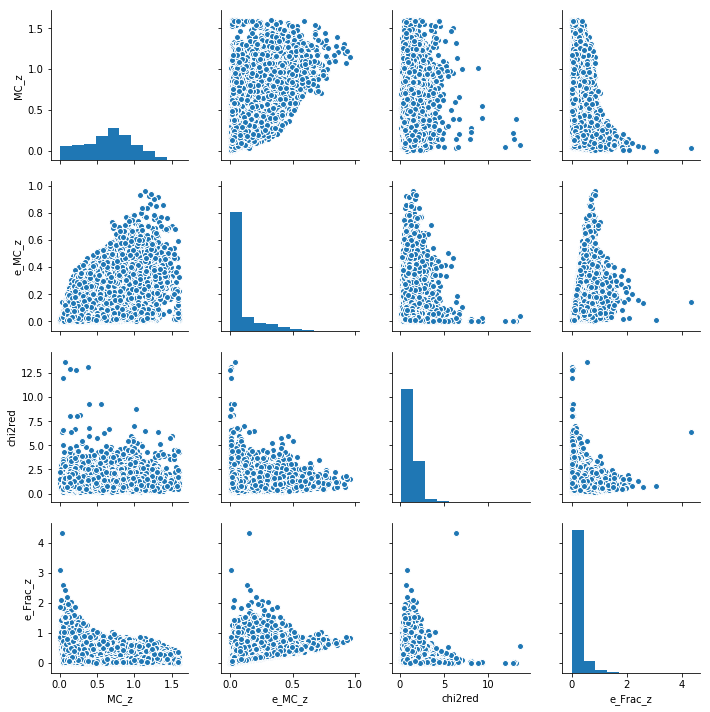

In [197]:
sns.pairplot(redshift)

/home/maia/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


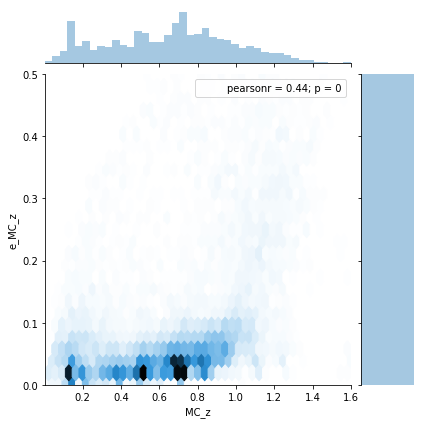

In [198]:
sns.jointplot(x='MC_z',y='e_MC_z',data=redshift, kind = 'hex')
plt.ylim(0,0.5)
plt.xlim(0,1.4)
plt.show()

/home/maia/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


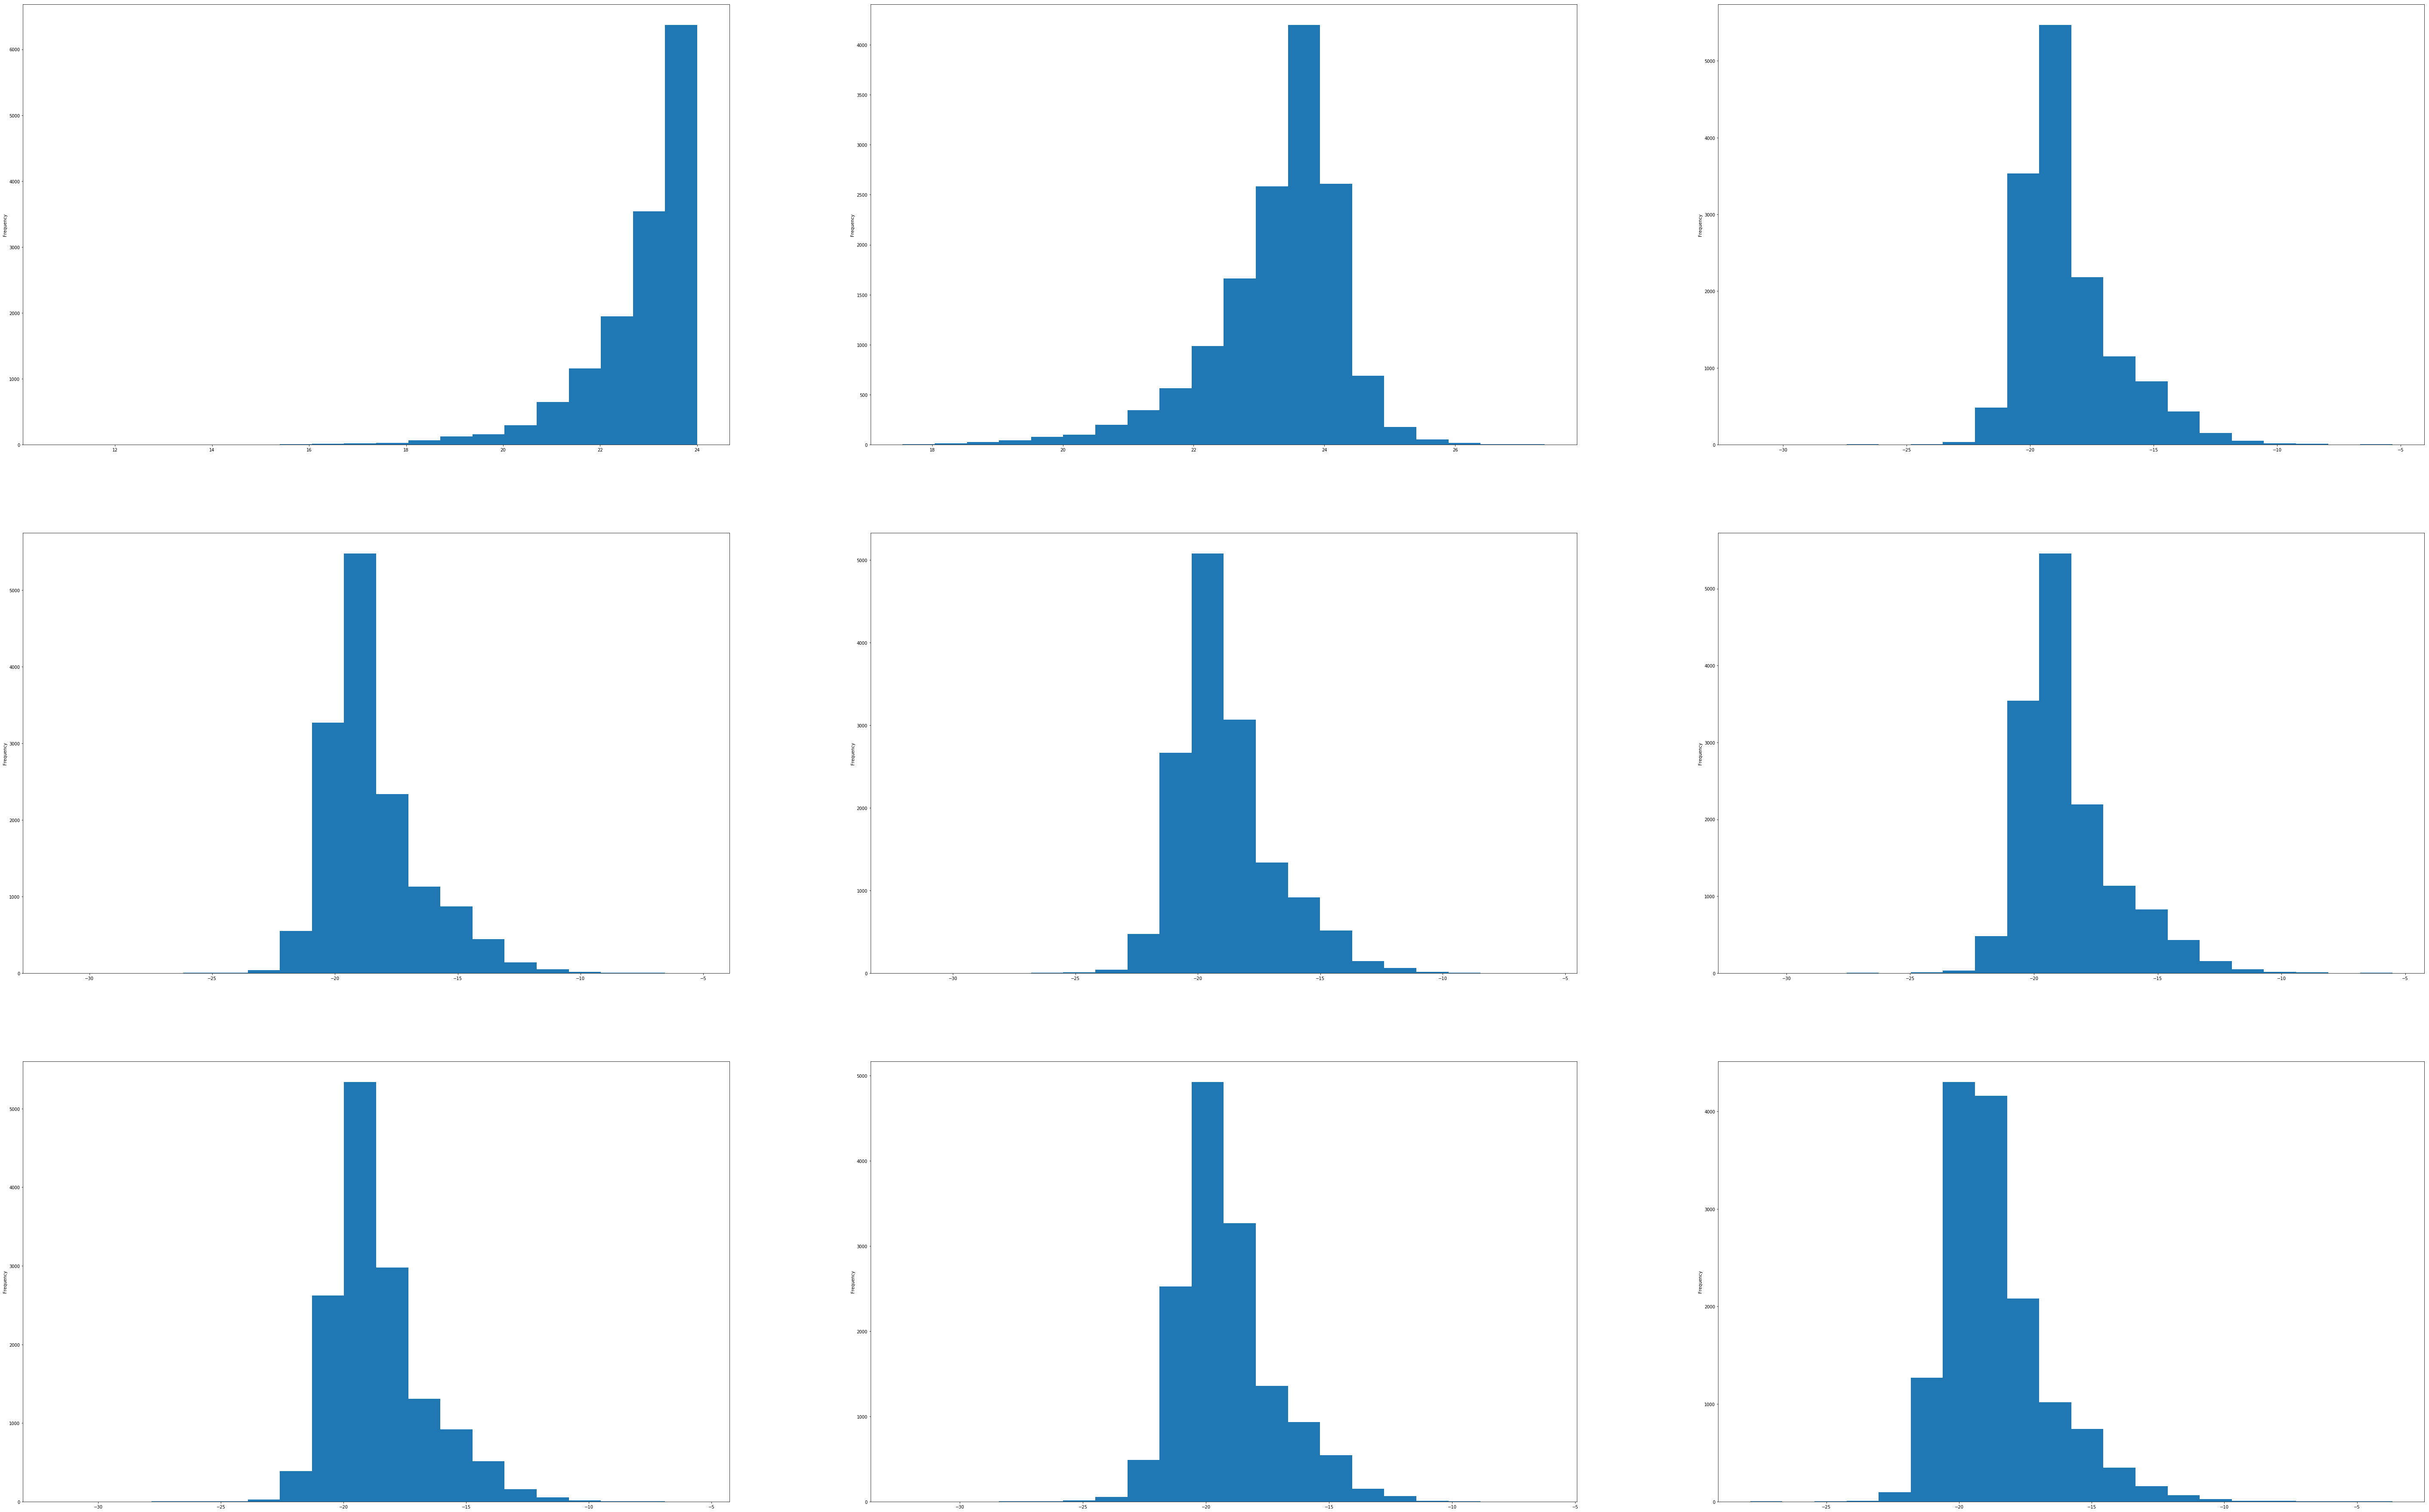

In [199]:
#plot histograms of all of the magnitudes
plt.subplot(3,3,1)
i=1
for column in mags:
    plt.subplot(3,3,i)
    mags[column].plot(kind='hist', bins=20)
    i+=1
    
plt.rcParams["figure.figsize"] = [100,64]
plt.show()


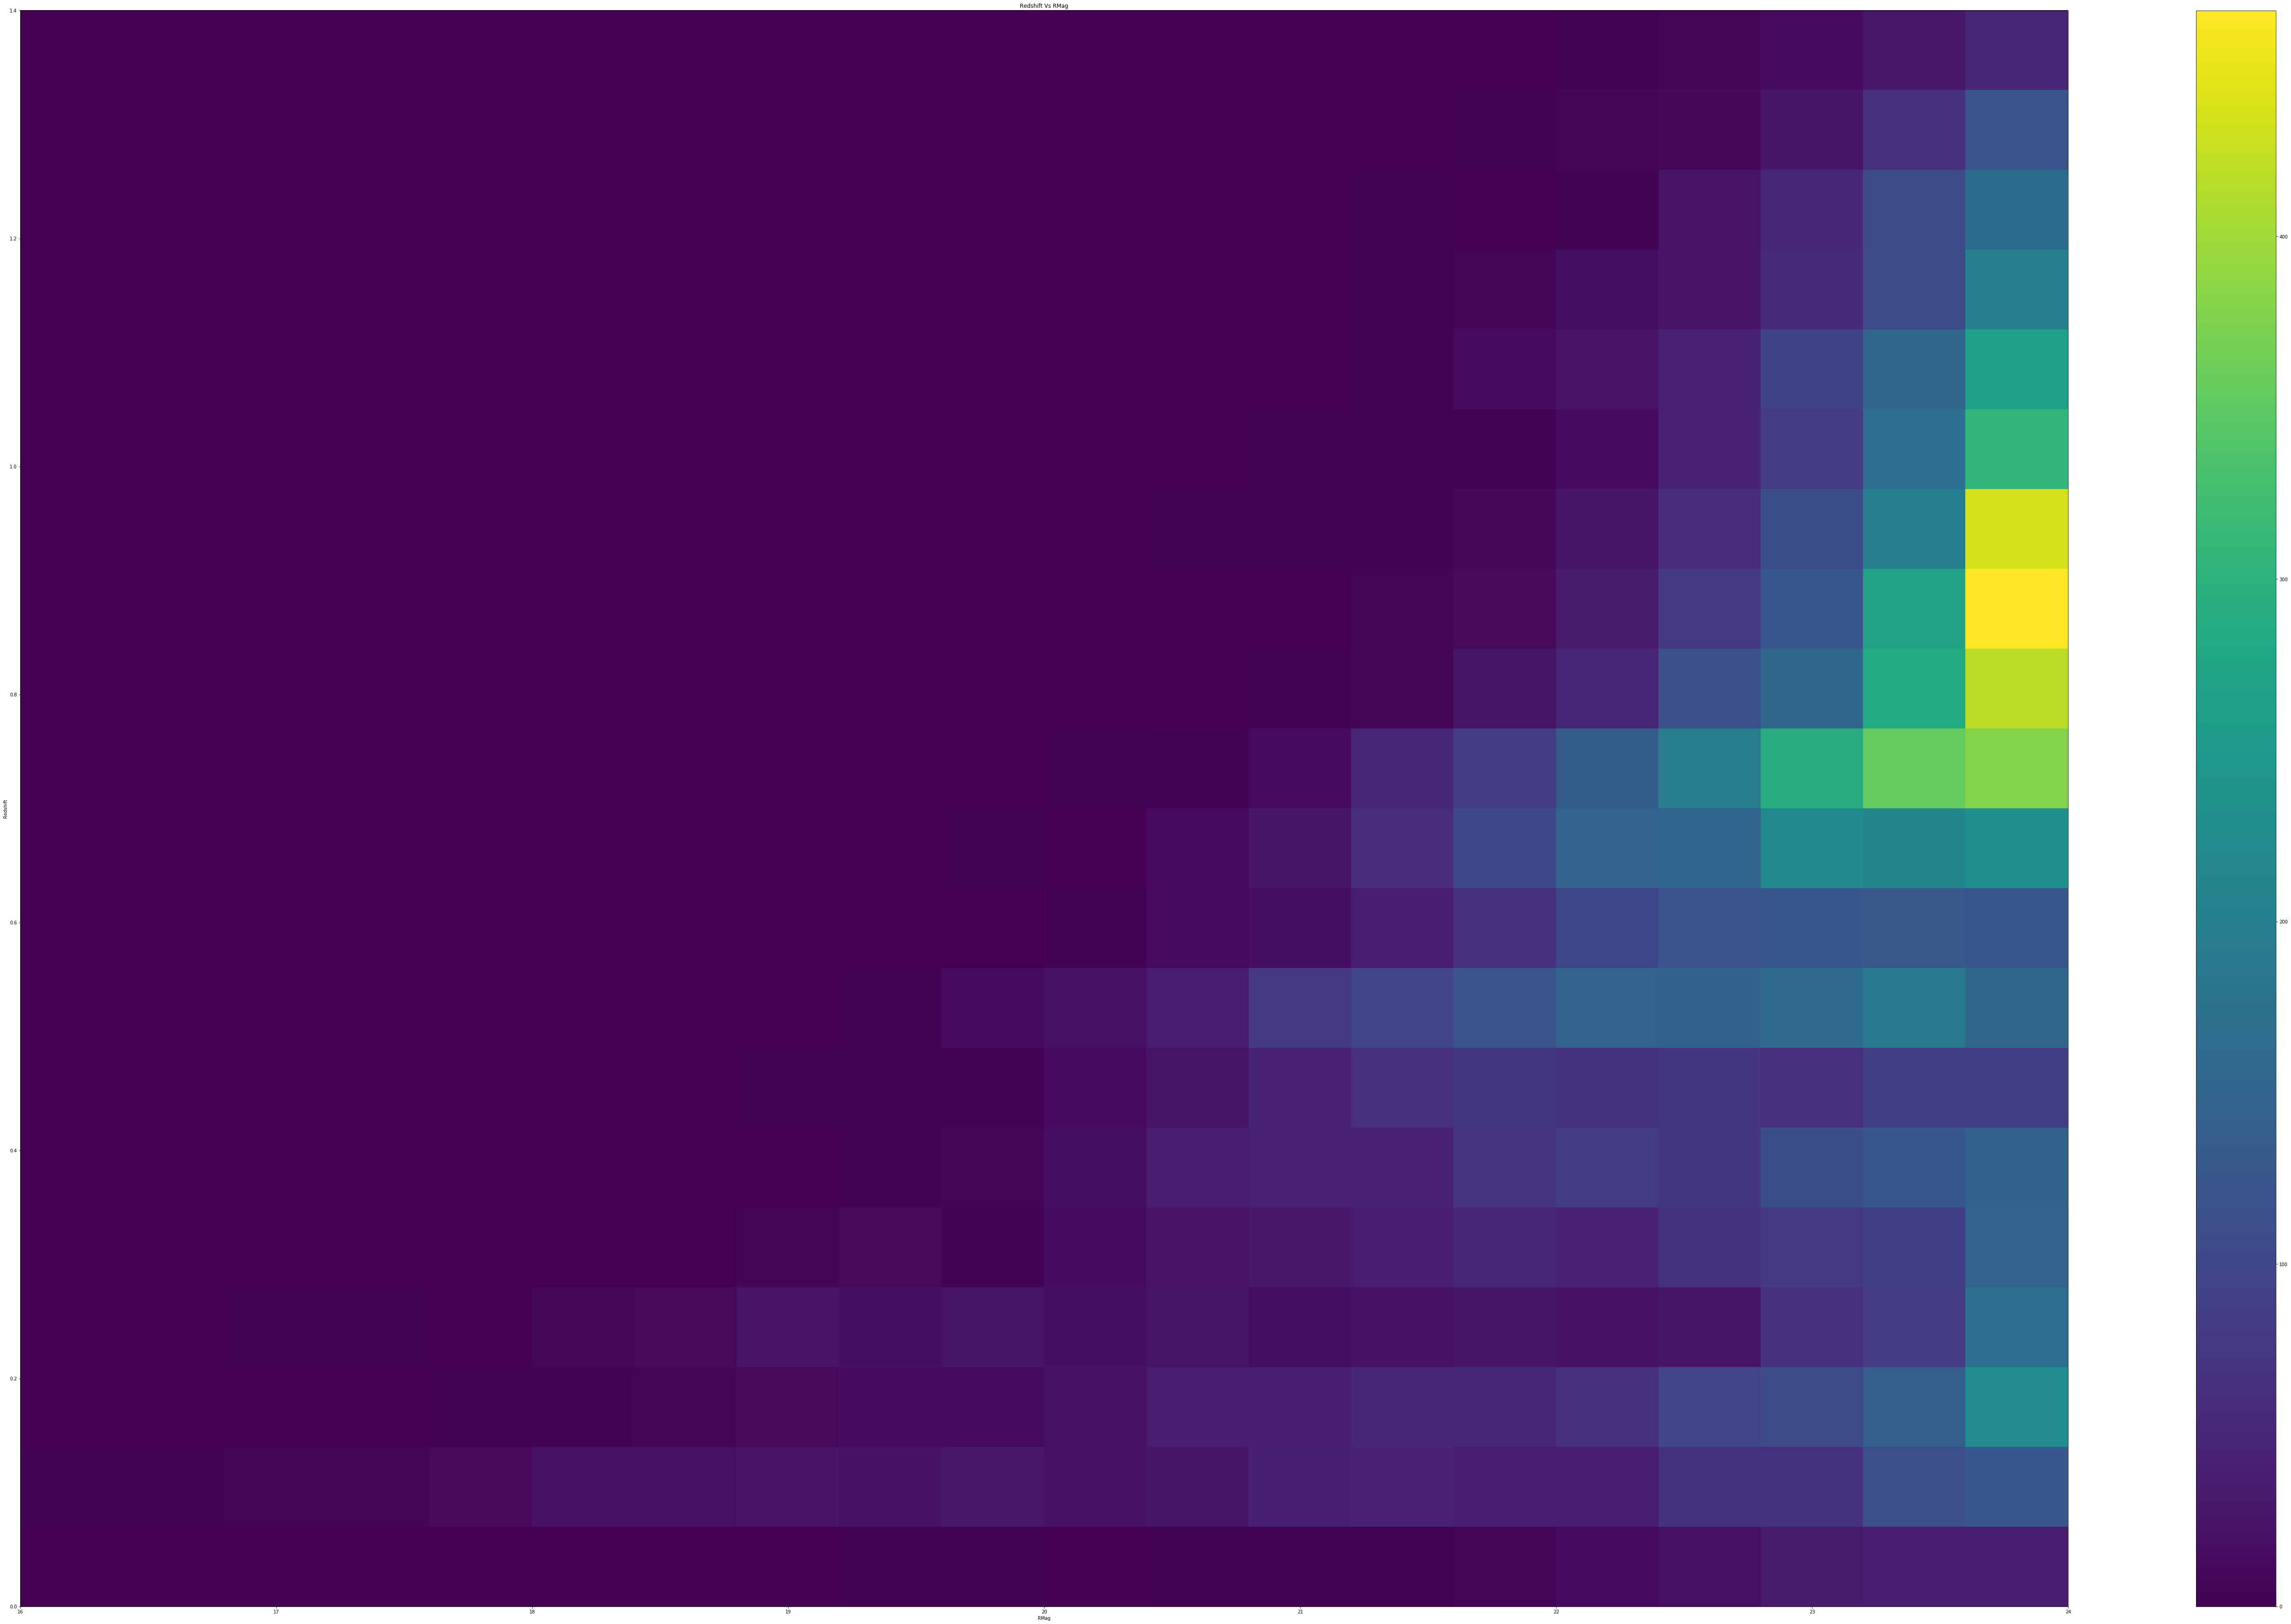

In [200]:
# Generate a 2-D histogram
plt.hist2d(mags['Rmag'],redshift['MC_z'], bins=(20,20), range=((16,24),(0,1.4)))
plt.colorbar()
plt.xlabel('RMag')
plt.ylabel('Redshift')
plt.title('Redshift Vs RMag')
plt.show()

In [201]:
fracMagErr = magsErr/mags.values
fracMagErr

e_Rmag  ApD_Rmag   e_UjMag   e_BjMag   e_VjMag   e_usMag   e_gsMag  \
Seq                                                                             
28.0     0.002665 -0.107079 -0.163717 -0.160110 -0.153972 -0.162578 -0.158234   
29.0     0.002367 -0.064628 -0.008371 -0.075104 -0.073420 -0.008314 -0.074628   
71.0     0.001966 -0.003568 -0.006313 -0.006143 -0.006958 -0.006275 -0.007189   
83.0     0.001149 -0.004225 -0.005247 -0.006993 -0.006917 -0.005197 -0.006968   
93.0     0.002300  0.004086 -0.013921 -0.013074 -0.008630 -0.013788 -0.008944   
104.0    0.000894  0.008047 -0.011052 -0.010163 -0.008691 -0.010923 -0.009223   
120.0    0.001944 -0.025622 -0.005696 -0.007442 -0.007256 -0.005658 -0.007389   
121.0    0.000845 -0.013353 -0.006110 -0.006060 -0.005579 -0.006033 -0.005687   
122.0    0.000881 -0.011599 -0.006018 -0.006010 -0.005644 -0.006092 -0.005739   
124.0    0.000999 -0.010912 -0.005095 -0.006173 -0.006069 -0.005059 -0.006144   
125.0    0.001899 -0.014341 -0.005713 -0.007010 -0.006895 -0.005671 -0.006978   
126.0    0.001495  0.000858 -0.008462 -0.009035 -0.007668 -0.008377 -0.007836   
139.0    0.002537 -0.006715 -0.006516 -0.006335 -0.007790 -0.006478 -0.008052   
153.0    0.002765 -0.020474 -0.006272 -0.010771 -0.010561 -0.006229 -0.010712   
162.0    0.001749 -0.009303 -0.005868 -0.005951 -0.011713 -0.005812 -0.011823   
182.0    0.002702 -0.007820 -0.006402 -0.015723 -0.015597 -0.006338 -0.015685   
183.0    0.001465  0.002521 -0.005842 -0.005843 -0.008162 -0.005797 -0.008275   
185.0    0.002355  0.000537 -0.006425 -0.006503 -0.013069 -0.006366 -0.013175   
192.0    0.002379 -0.094614 -0.037535 -0.036994 -0.035831 -0.037290 -0.036648   
196.0    0.001126 -0.014417 -0.006631 -0.006694 -0.005802 -0.006243 -0.005891   
197.0    0.001768  0.002361 -0.006487 -0.006279 -0.011637 -0.006414 -0.006263   
198.0    0.001750 -0.012983 -0.008906 -0.007726 -0.006576 -0.008833 -0.006694   
207.0    0.002560 -0.041862 -0.009479 -0.006824 -0.039312 -0.009399 -0.006786   
215.0    0.000120 -0.205550 -0.011259 -0.024768 -0.024254 -0.011194 -0.024621   
218.0    0.001310 -0.014335 -0.007334 -0.006969 -0.006477 -0.007254 -0.006565   
219.0    0.002184 -0.003524 -0.010361 -0.010401 -0.010258 -0.010283 -0.010362   
220.0    0.001280 -0.007850 -0.006579 -0.005843 -0.005752 -0.006520 -0.005817   
224.0    0.000725  0.002088 -0.007141 -0.005655 -0.005480 -0.007093 -0.005604   
237.0    0.004067 -0.089569 -0.094555 -0.094488 -0.092864 -0.093884 -0.094034   
239.0    0.002904 -0.007772 -0.009194 -0.009276 -0.009196 -0.009120 -0.009255   
...           ...       ...       ...       ...       ...       ...       ...   
63347.0  0.002639 -0.068231 -0.007602 -0.034185 -0.033737 -0.007543 -0.034064   
63351.0  0.002941 -0.013807 -0.010714 -0.010067 -0.007931 -0.010619 -0.008085   
63356.0  0.001469 -0.020589 -0.009278 -0.009506 -0.006839 -0.009198 -0.007009   
63359.0  0.000669 -0.016345 -0.005297 -0.005087 -0.004904 -0.005261 -0.005083   
63377.0  0.002183 -0.010087 -0.011573 -0.010102 -0.008099 -0.011450 -0.008224   
63379.0  0.000872 -0.035723 -0.007652 -0.005296 -0.005877 -0.007600 -0.005239   
63380.0  0.001297 -0.025787 -0.008379 -0.006060 -0.020479 -0.008309 -0.006035   
63384.0  0.003640 -0.034378 -0.012590 -0.012515 -0.009513 -0.012428 -0.009633   
63387.0  0.002143 -0.009662 -0.014547 -0.013321 -0.007694 -0.014423 -0.007974   
63391.0  0.002309 -0.021699 -0.009319 -0.010664 -0.007683 -0.009222 -0.007792   
63396.0  0.000538 -0.035925 -0.005435 -0.005321 -0.005232 -0.005386 -0.005294   
63399.0  0.000461 -0.024060 -0.005092 -0.005049 -0.005516 -0.005055 -0.005022   
63414.0  0.001950 -0.005943 -0.008153 -0.009234 -0.007710 -0.008047 -0.007812   
63416.0  0.001756 -0.007180 -0.005747 -0.005839 -0.008571 -0.005692 -0.008644   
63422.0  0.002101 -0.011603 -0.010992 -0.011603 -0.008629 -0.010888 -0.008862   
63431.0  0.001762 -0.009790 -0.008584 -0.008603 -0.007076 -0.008502 -0.007210   
63435.0  0.002944 -0.013133 -0.006773 -0.0

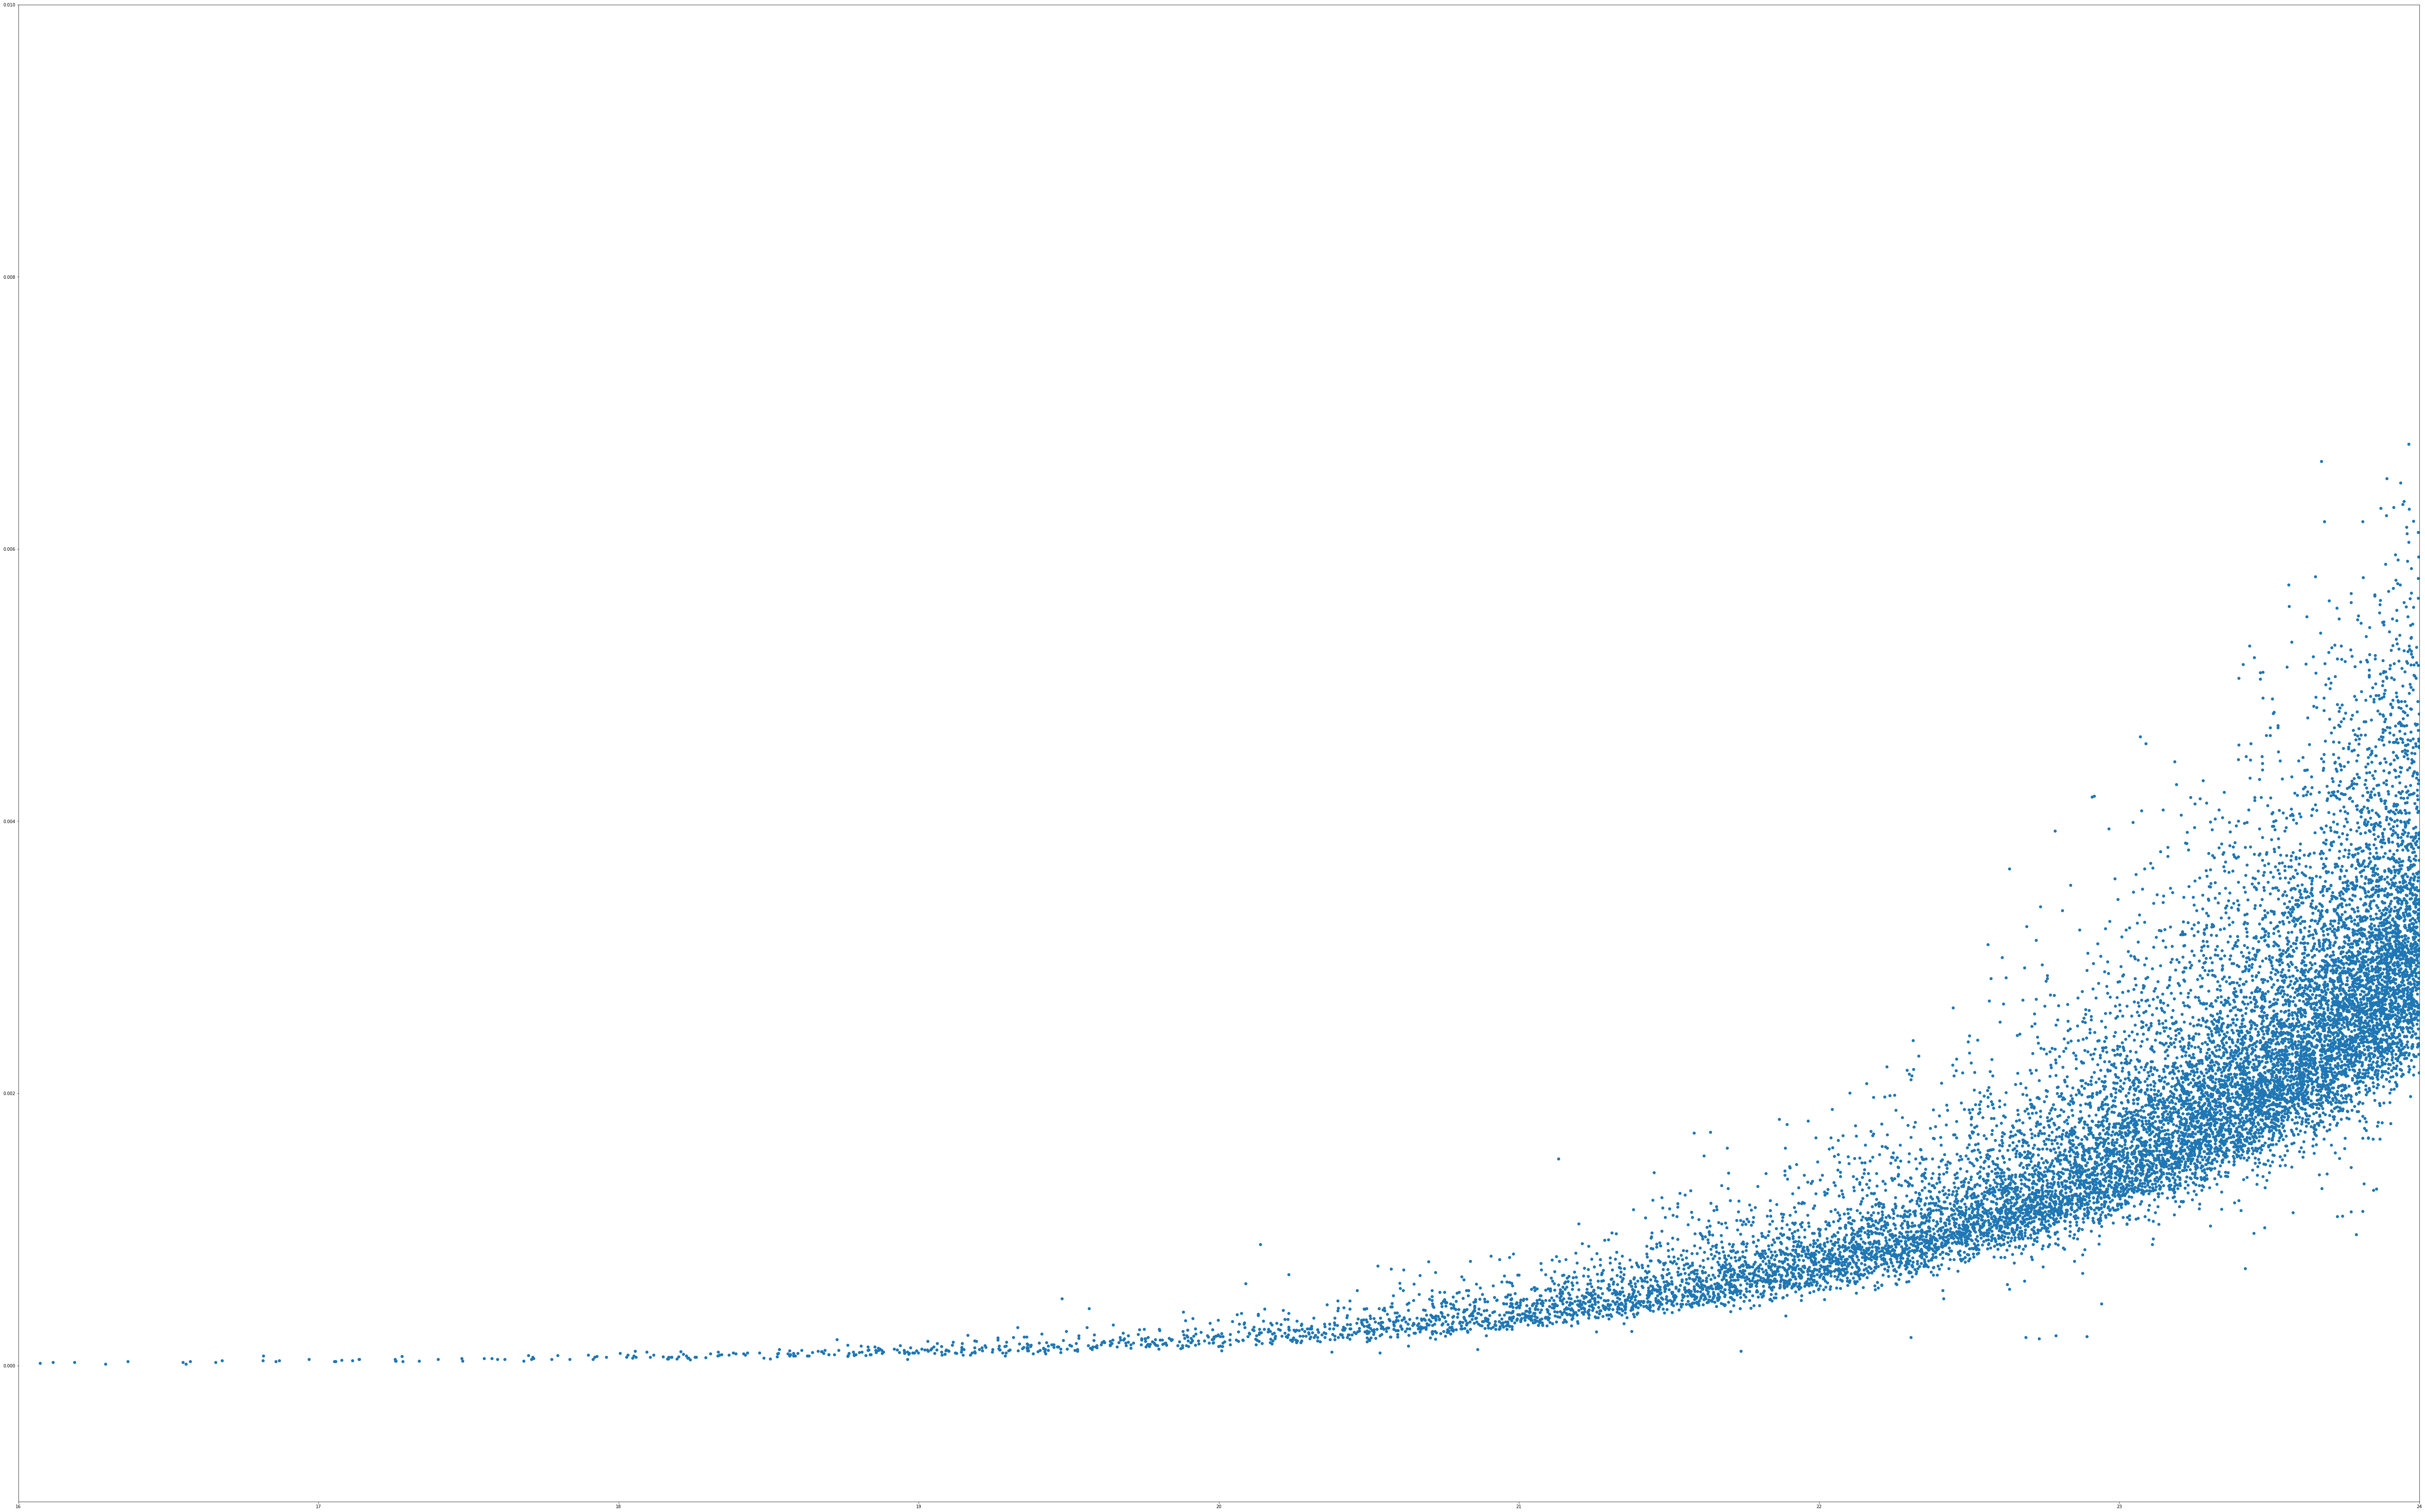

In [202]:
#plot Rmag against the fractional error 
plt.scatter(mags['Rmag'],fracMagErr['e_Rmag'])
plt.xlim(16,24)
plt.ylim(-0.001,0.01)
plt.show()

/home/maia/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


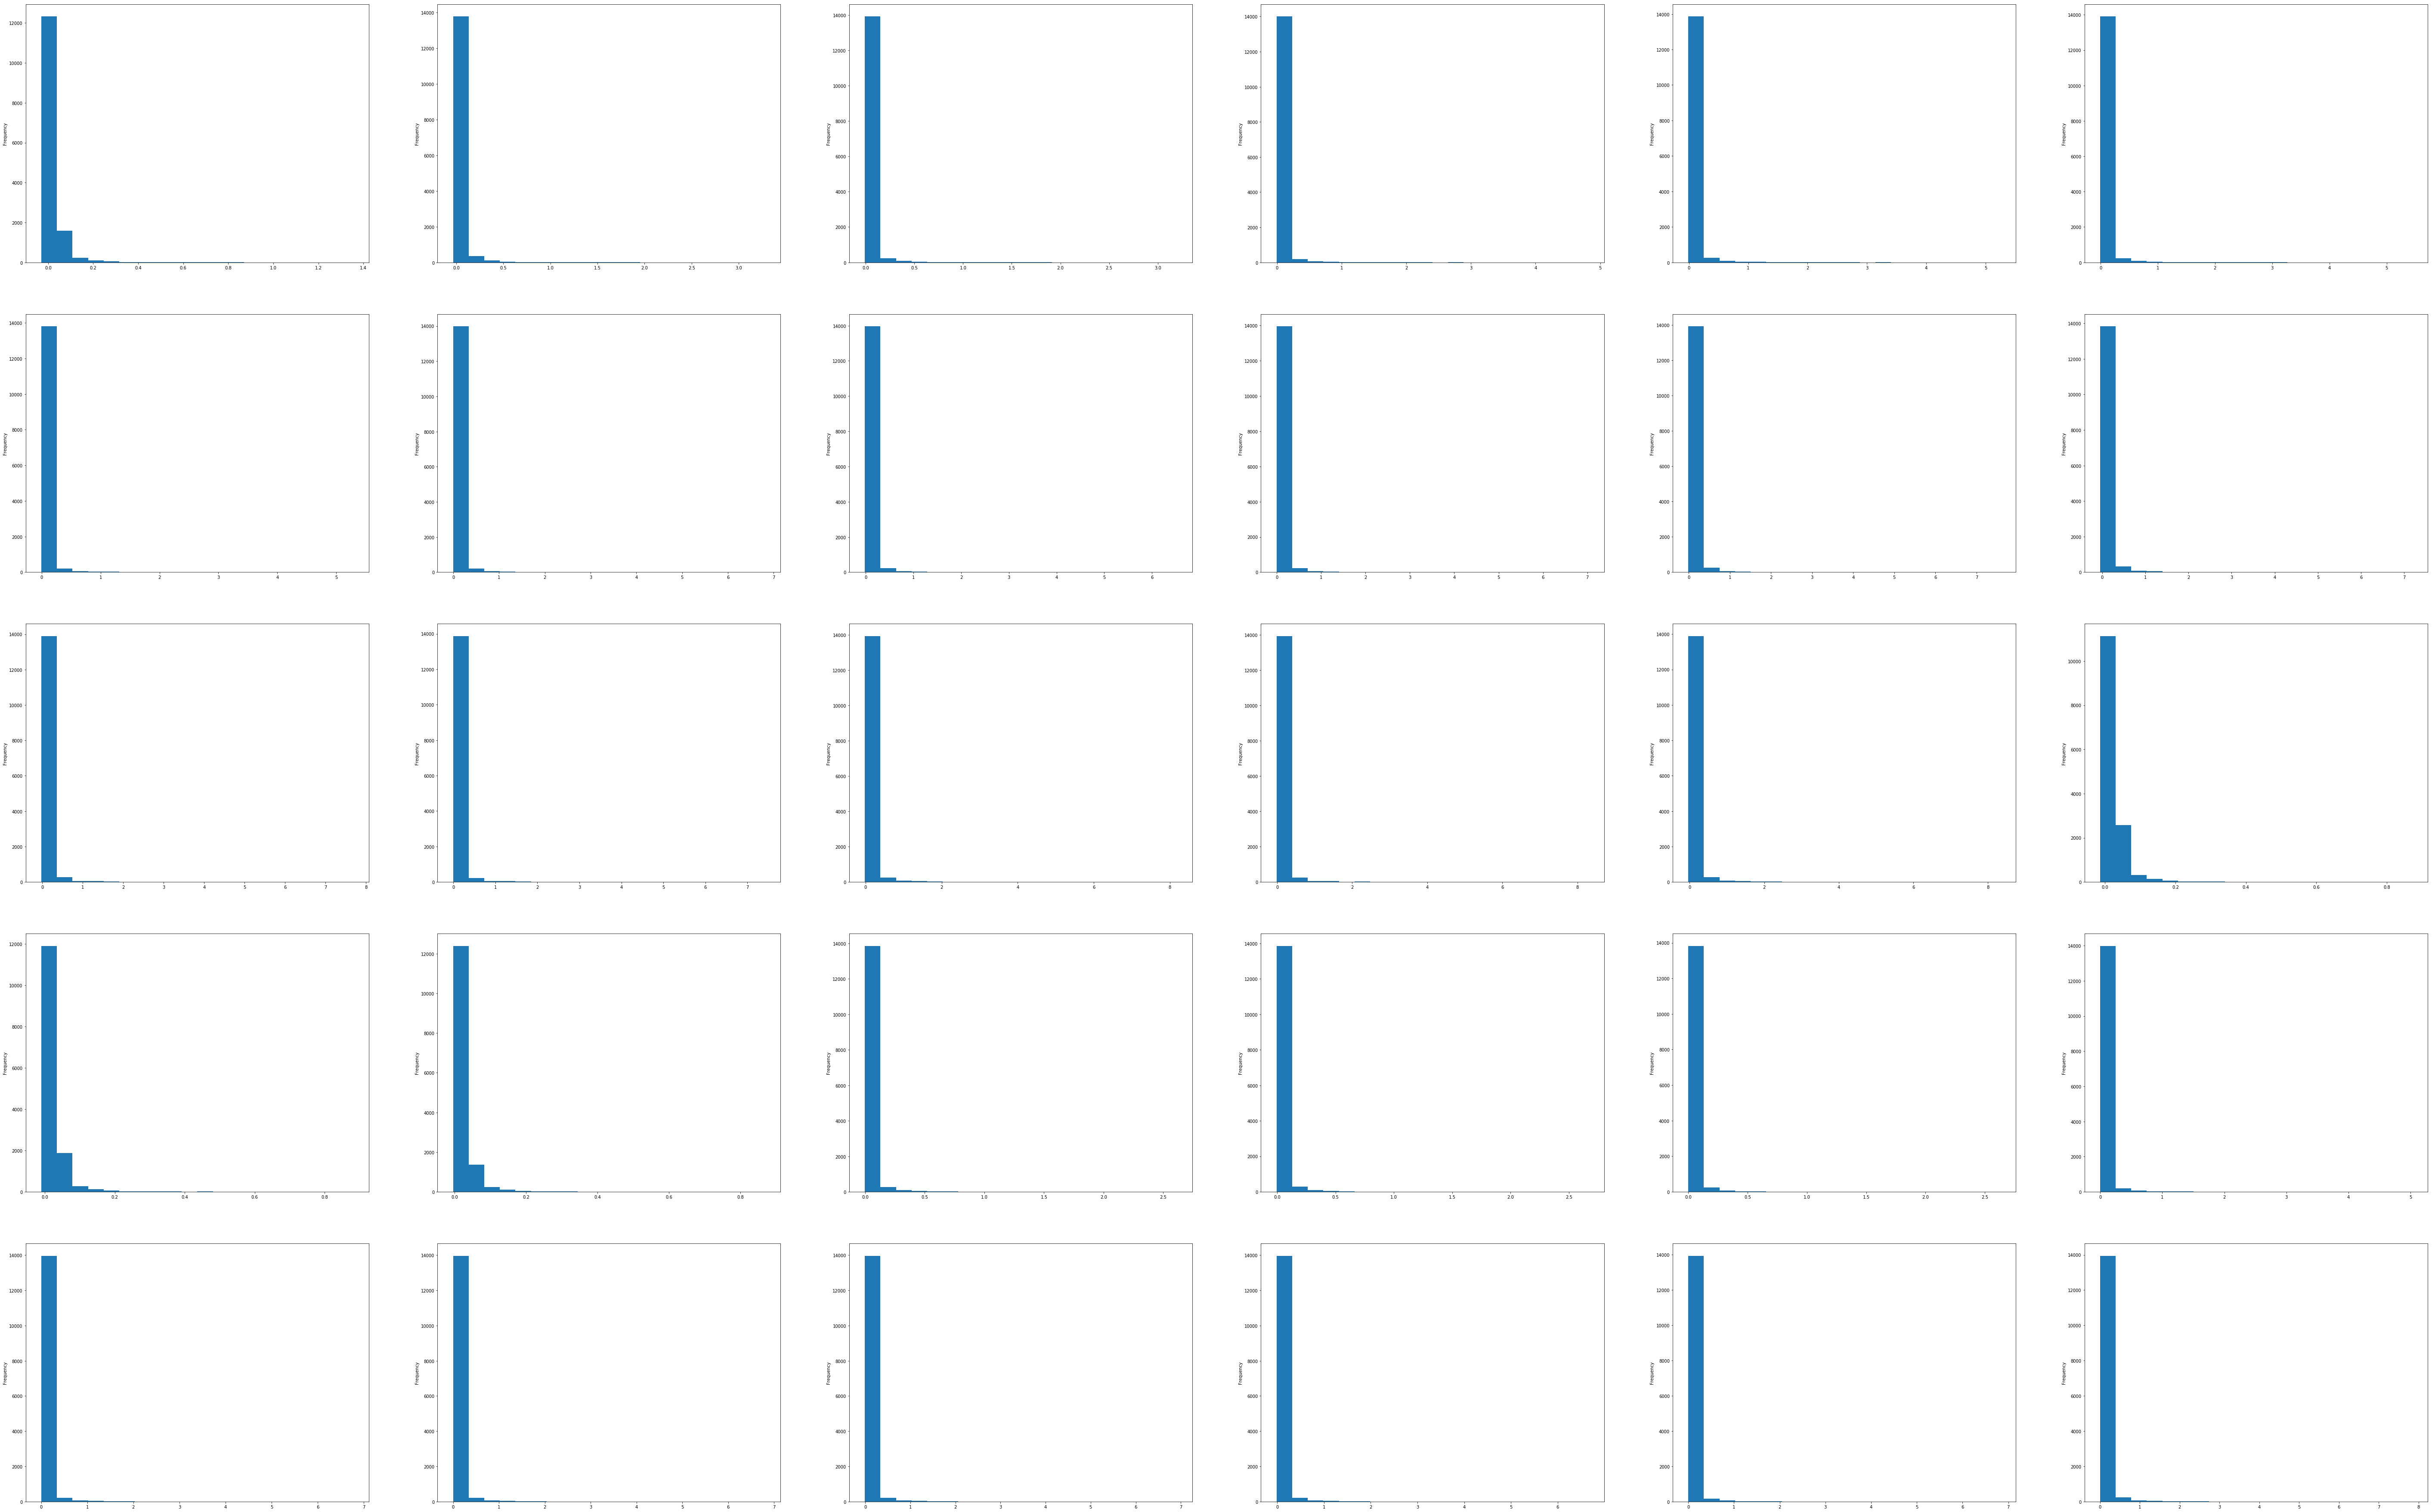

In [203]:
#make histograms of all photon fluxes 
plt.subplot(5,6,1)
i=1
for column in flux:
    plt.subplot(5,6,i)
    flux[column].plot(kind='hist', bins=20)
    i+=1
    
plt.rcParams["figure.figsize"] = [100,64]
plt.show()

In [204]:
#find correlations between mags and fluxes
fluxMag = [mags, flux]
fluxMag = pd.concat(fluxMag, axis=1)
fluxMag

Rmag    Ap_Rmag      UjMag      BjMag      VjMag      usMag  \
Seq                                                                         
28.0     23.980591  26.790945 -20.369415 -20.828274 -21.658553 -20.512117   
29.0     23.740246  25.318111 -19.150250 -18.206184 -18.623569 -19.282882   
71.0     23.596121  23.622013 -17.913065 -18.407511 -19.337878 -18.020763   
83.0     22.883890  22.922358 -19.849175 -19.536735 -19.752779 -20.040451   
93.0     23.874487  23.719187 -12.193742 -12.597335 -13.461531 -12.311554   
104.0    22.933117  22.692135 -10.174512 -10.708576 -11.787096 -10.294831   
120.0    23.099501  23.646997 -19.589496 -19.902149 -20.413552 -19.718740   
121.0    22.009174  22.247860 -17.555708 -17.699823 -18.262112 -17.711988   
122.0    22.350588  22.553818 -17.714958 -17.738366 -18.141507 -17.874135   
124.0    22.729013  22.920753 -20.238467 -20.091605 -20.434785 -20.380677   
125.0    23.378035  23.658939 -19.509429 -19.596124 -19.923980 -19.653428   
126.0    23.342981  23.264631 -13.429087 -13.449087 -13.962749 -13.564875   
139.0    23.803795  23.905952 -18.274485 -18.799005 -19.758987 -18.382595   
153.0    23.468828  23.899773 -19.614750 -19.384233 -19.769295 -19.750264   
162.0    23.443321  23.604538 -18.775488 -18.512116 -18.578872 -18.953863   
182.0    23.686937  23.814775 -19.012233 -18.434209 -18.582605 -19.203989   
183.0    23.276030  23.159254 -18.256552 -18.251216 -18.673075 -18.396421   
185.0    23.860867  23.789709 -18.228467 -18.008270 -18.243856 -18.396661   
192.0    23.669029  26.077984 -21.600230 -21.916110 -22.627370 -21.742069   
196.0    22.655312  22.927481 -17.656980 -17.490404 -17.889505 -17.812242   
197.0    23.523581  23.409918 -18.117518 -17.439453 -17.494794 -18.323549   
198.0    23.142244  23.387506 -16.170177 -16.189940 -16.669552 -16.303633   
207.0    23.244696  24.199350 -18.817171 -18.162408 -18.140141 -18.978451   
215.0    20.862370  26.186646 -22.420549 -22.977328 -23.463454 -22.550317   
218.0    22.821920  23.094595 -16.046518 -15.914188 -16.253774 -16.223437   
219.0    23.896990  23.922909 -19.742815 -19.666871 -19.940787 -19.892494   
220.0    22.884827  23.007051 -18.099916 -17.935623 -18.217270 -18.261513   
224.0    22.746115  22.640471 -17.520938 -17.992546 -18.567137 -17.639264   
237.0    23.900452  26.187668 -19.998146 -20.012334 -20.362240 -20.141044   
239.0    23.692974  23.819731 -20.078635 -19.901437 -20.074213 -20.241272   
...            ...        ...        ...        ...        ...        ...   
63347.0  23.758965  25.436121 -19.612355 -19.078392 -19.331446 -19.765742   
63351.0  23.700565  23.973190 -15.106494 -15.372196 -15.679455 -15.242283   
63356.0  23.077789  23.503326 -14.783096 -15.101633 -15.730817 -14.912237   
63359.0  22.128281  22.436623 -19.143267 -19.935017 -20.976545 -19.274038   
63377.0  23.727745  23.910553 -14.244433 -14.233999 -14.508996 -14.397671   
63379.0  22.142475  22.902231 -18.950964 -19.364164 -20.196604 -19.081540   
63380.0  23.135599  23.688063 -17.694032 -17.744477 -17.642506 -17.843710   
63384.0  23.847136  24.635668 -14.848057 -14.567146 -14.765692 -15.041939   
63387.0  23.796534  23.969753 -13.762718 -14.021869 -15.174554 -13.881375   
63391.0  23.606901  24.070841 -14.904615 -14.813497 -15.258020 -15.061940   
63396.0  21.566763  22.309870 -19.160087 -18.957624 -19.278900 -19.333617   
63399.0  21.462069  21.931349 -20.100242 -19.923585 -20.256326 -20.246274   
63414.0  23.488401  23.570089 -14.534027 -14.259261 -14.518061 -14.724775   
63416.0  23.230715  23.339918 -18.986500 -18.687936 -19.012006 -19.170636   
63422.0  23.658243  23.876900 -12.772811 -12.930367 -13.583482 -12.894821   
63431.0  23.103090  23.272537 -14.693325 -14.902065 -15.386067 -14.834503   
63435.0  23.913155  24.172222 -18.807362 -19.078168 -19.544004 -18.947809   
63441.0  23.237989  23.429085 -16.993283 -16.870528 -17.203158 -17.020707   
63443.0  23.820749  23.775404 -20.035937 -19.865623 -20.087967 -20.196933   
63446.0  2

In [205]:
#cut down duplicate observations 
fluxMag=fluxMag.drop(columns=['W571F_S','W571F_D','W815F_S','W815F_G','W914F_E','UF_S','UF_F','BF_S','BF_F','RF_S','RF_E','RF_F','RF_G'])
fluxMag

Rmag    Ap_Rmag      UjMag      BjMag      VjMag      usMag  \
Seq                                                                         
28.0     23.980591  26.790945 -20.369415 -20.828274 -21.658553 -20.512117   
29.0     23.740246  25.318111 -19.150250 -18.206184 -18.623569 -19.282882   
71.0     23.596121  23.622013 -17.913065 -18.407511 -19.337878 -18.020763   
83.0     22.883890  22.922358 -19.849175 -19.536735 -19.752779 -20.040451   
93.0     23.874487  23.719187 -12.193742 -12.597335 -13.461531 -12.311554   
104.0    22.933117  22.692135 -10.174512 -10.708576 -11.787096 -10.294831   
120.0    23.099501  23.646997 -19.589496 -19.902149 -20.413552 -19.718740   
121.0    22.009174  22.247860 -17.555708 -17.699823 -18.262112 -17.711988   
122.0    22.350588  22.553818 -17.714958 -17.738366 -18.141507 -17.874135   
124.0    22.729013  22.920753 -20.238467 -20.091605 -20.434785 -20.380677   
125.0    23.378035  23.658939 -19.509429 -19.596124 -19.923980 -19.653428   
126.0    23.342981  23.264631 -13.429087 -13.449087 -13.962749 -13.564875   
139.0    23.803795  23.905952 -18.274485 -18.799005 -19.758987 -18.382595   
153.0    23.468828  23.899773 -19.614750 -19.384233 -19.769295 -19.750264   
162.0    23.443321  23.604538 -18.775488 -18.512116 -18.578872 -18.953863   
182.0    23.686937  23.814775 -19.012233 -18.434209 -18.582605 -19.203989   
183.0    23.276030  23.159254 -18.256552 -18.251216 -18.673075 -18.396421   
185.0    23.860867  23.789709 -18.228467 -18.008270 -18.243856 -18.396661   
192.0    23.669029  26.077984 -21.600230 -21.916110 -22.627370 -21.742069   
196.0    22.655312  22.927481 -17.656980 -17.490404 -17.889505 -17.812242   
197.0    23.523581  23.409918 -18.117518 -17.439453 -17.494794 -18.323549   
198.0    23.142244  23.387506 -16.170177 -16.189940 -16.669552 -16.303633   
207.0    23.244696  24.199350 -18.817171 -18.162408 -18.140141 -18.978451   
215.0    20.862370  26.186646 -22.420549 -22.977328 -23.463454 -22.550317   
218.0    22.821920  23.094595 -16.046518 -15.914188 -16.253774 -16.223437   
219.0    23.896990  23.922909 -19.742815 -19.666871 -19.940787 -19.892494   
220.0    22.884827  23.007051 -18.099916 -17.935623 -18.217270 -18.261513   
224.0    22.746115  22.640471 -17.520938 -17.992546 -18.567137 -17.639264   
237.0    23.900452  26.187668 -19.998146 -20.012334 -20.362240 -20.141044   
239.0    23.692974  23.819731 -20.078635 -19.901437 -20.074213 -20.241272   
...            ...        ...        ...        ...        ...        ...   
63347.0  23.758965  25.436121 -19.612355 -19.078392 -19.331446 -19.765742   
63351.0  23.700565  23.973190 -15.106494 -15.372196 -15.679455 -15.242283   
63356.0  23.077789  23.503326 -14.783096 -15.101633 -15.730817 -14.912237   
63359.0  22.128281  22.436623 -19.143267 -19.935017 -20.976545 -19.274038   
63377.0  23.727745  23.910553 -14.244433 -14.233999 -14.508996 -14.397671   
63379.0  22.142475  22.902231 -18.950964 -19.364164 -20.196604 -19.081540   
63380.0  23.135599  23.688063 -17.694032 -17.744477 -17.642506 -17.843710   
63384.0  23.847136  24.635668 -14.848057 -14.567146 -14.765692 -15.041939   
63387.0  23.796534  23.969753 -13.762718 -14.021869 -15.174554 -13.881375   
63391.0  23.606901  24.070841 -14.904615 -14.813497 -15.258020 -15.061940   
63396.0  21.566763  22.309870 -19.160087 -18.957624 -19.278900 -19.333617   
63399.0  21.462069  21.931349 -20.100242 -19.923585 -20.256326 -20.246274   
63414.0  23.488401  23.570089 -14.534027 -14.259261 -14.518061 -14.724775   
63416.0  23.230715  23.339918 -18.986500 -18.687936 -19.012006 -19.170636   
63422.0  23.658243  23.876900 -12.772811 -12.930367 -13.583482 -12.894821   
63431.0  23.103090  23.272537 -14.693325 -14.902065 -15.386067 -14.834503   
63435.0  23.913155  24.172222 -18.807362 -19.078168 -19.544004 -18.947809   
63441.0  23.237989  23.429085 -16.993283 -16.870528 -17.203158 -17.020707   
63443.0  23.820749  23.775404 -20.035937 -19.865623 -20.087967 -20.196933   
63446.0  2

In [206]:
#find which sets of magnitudes and fluxes have a high correlation 
pairs = []

for column in fluxMag:
    for column2 in fluxMag:
        (r, p) = pearsonr(fluxMag[column], fluxMag[column2])
        if ((r>0.95) or (r<-0.95)) and (p!=1) and (r!=1) and (column!=column2):
            pairs.append((column,column2))
            
pairs

[('UjMag', 'BjMag'),
 ('UjMag', 'VjMag'),
 ('UjMag', 'usMag'),
 ('UjMag', 'gsMag'),
 ('UjMag', 'rsMag'),
 ('BjMag', 'UjMag'),
 ('BjMag', 'VjMag'),
 ('BjMag', 'usMag'),
 ('BjMag', 'gsMag'),
 ('BjMag', 'rsMag'),
 ('VjMag', 'UjMag'),
 ('VjMag', 'BjMag'),
 ('VjMag', 'usMag'),
 ('VjMag', 'gsMag'),
 ('VjMag', 'rsMag'),
 ('usMag', 'UjMag'),
 ('usMag', 'BjMag'),
 ('usMag', 'VjMag'),
 ('usMag', 'gsMag'),
 ('usMag', 'rsMag'),
 ('gsMag', 'UjMag'),
 ('gsMag', 'BjMag'),
 ('gsMag', 'VjMag'),
 ('gsMag', 'usMag'),
 ('gsMag', 'rsMag'),
 ('rsMag', 'UjMag'),
 ('rsMag', 'BjMag'),
 ('rsMag', 'VjMag'),
 ('rsMag', 'usMag'),
 ('rsMag', 'gsMag'),
 ('W485F_D', 'W518F_E'),
 ('W485F_D', 'W604F_E'),
 ('W485F_D', 'W696F_E'),
 ('W485F_D', 'BF_D'),
 ('W485F_D', 'VF_D'),
 ('W485F_D', 'RF_D'),
 ('W518F_E', 'W485F_D'),
 ('W518F_E', 'W604F_E'),
 ('W518F_E', 'W696F_E'),
 ('W518F_E', 'W753F_E'),
 ('W518F_E', 'W815F_E'),
 ('W518F_E', 'W856F_D'),
 ('W518F_E', 'BF_D'),
 ('W518F_E', 'VF_D'),
 ('W518F_E', 'RF_D'),
 ('W518F_E', 

/home/maia/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


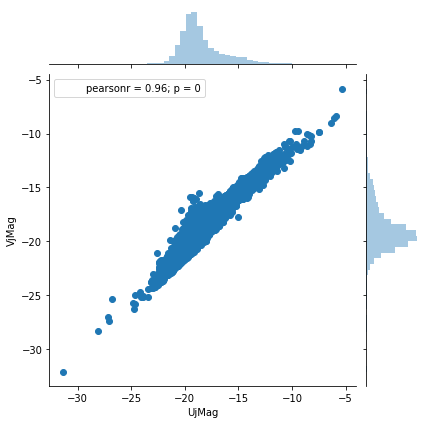

In [207]:
#plot a demonstration of this correlation
sns.jointplot(x='UjMag',y='VjMag', data=fluxMag)

In [208]:
#find which values correlate highly with the redshift 
match = []
fluxMag['redshift'] = redshift['MC_z']
for column in fluxMag:
    (r, p) = pearsonr(fluxMag[column], fluxMag['redshift'])
    if ((r>0.5) or (r<-0.5)) and (p!=1) and (r!=1):
        match.append(column)
            
match

['UjMag', 'BjMag', 'VjMag', 'usMag', 'gsMag', 'rsMag']

/home/maia/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


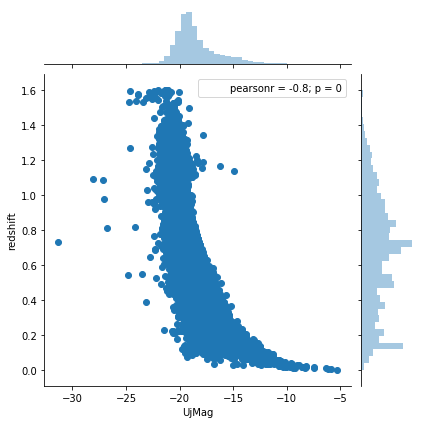

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


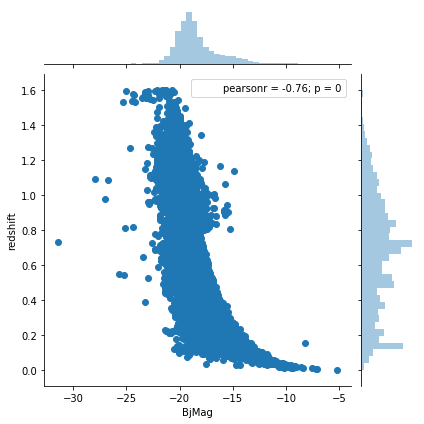

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


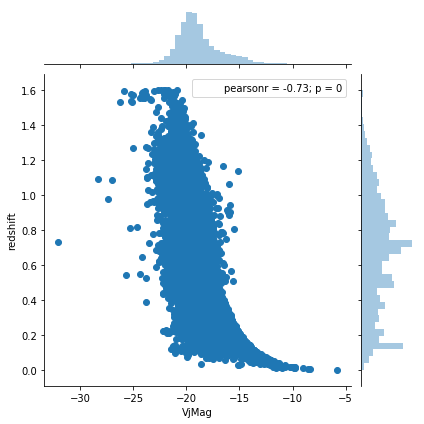

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


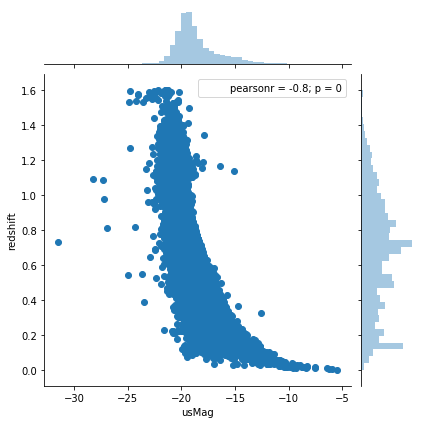

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


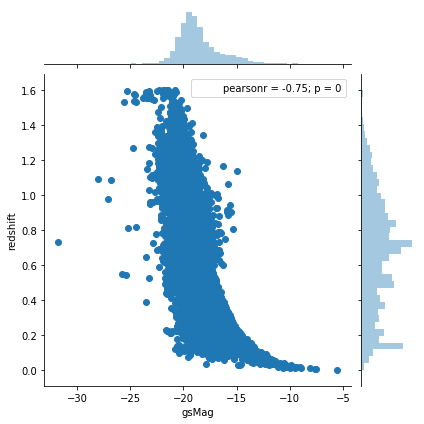

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


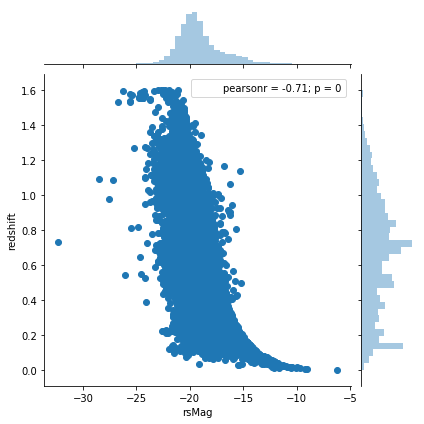

In [209]:
#plot the strongly correlated magnitudes

sns.jointplot(x='UjMag',y='redshift', data=fluxMag)
plt.show()

sns.jointplot(x='BjMag',y='redshift', data=fluxMag)
plt.show()

sns.jointplot(x='VjMag',y='redshift', data=fluxMag)
plt.show()

sns.jointplot(x='usMag',y='redshift', data=fluxMag)
plt.show()

sns.jointplot(x='gsMag',y='redshift', data=fluxMag)
plt.show()

sns.jointplot(x='rsMag',y='redshift', data=fluxMag)
plt.show()



/home/maia/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


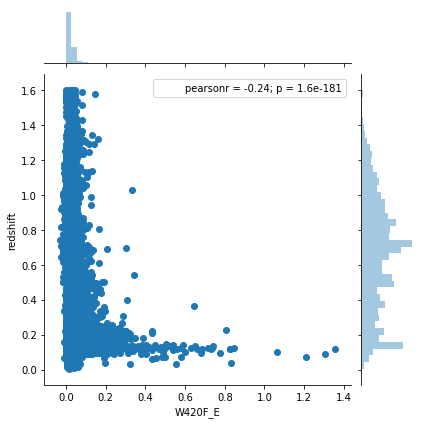

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


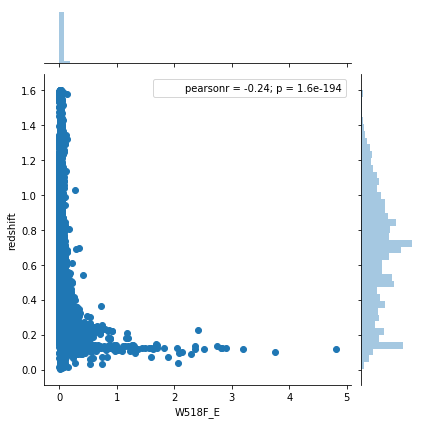

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


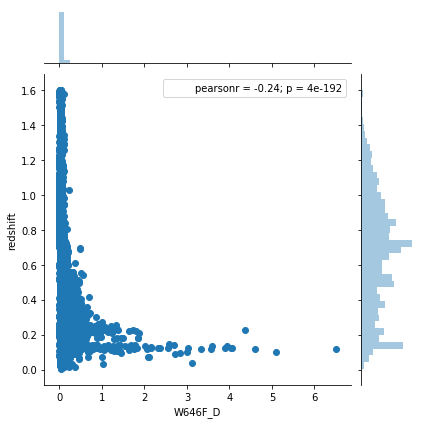

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


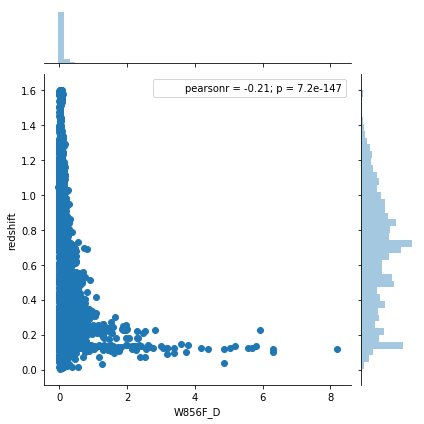

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


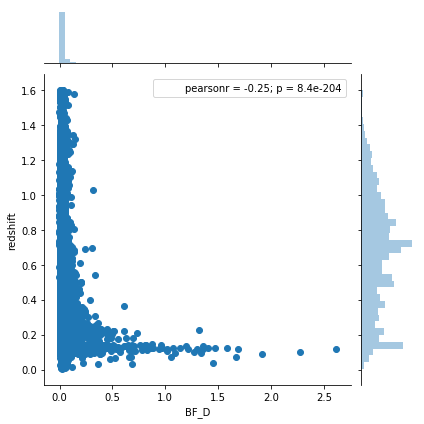

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


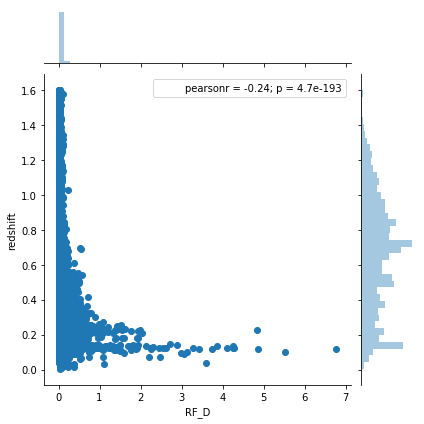

In [210]:
#plot some weakly correlated values to see the shapes
sns.jointplot(x='W420F_E',y='redshift', data=fluxMag)
plt.show()

sns.jointplot(x='W518F_E',y='redshift', data=fluxMag)
plt.show()

sns.jointplot(x='W646F_D',y='redshift', data=fluxMag)
plt.show()

sns.jointplot(x='W856F_D',y='redshift', data=fluxMag)
plt.show()

sns.jointplot(x='BF_D',y='redshift', data=fluxMag)
plt.show()

sns.jointplot(x='RF_D',y='redshift', data=fluxMag)
plt.show()


In [211]:
#look at the differences between the magnitudes vs redshift
magDiffs = pd.DataFrame()
magDiffs['redshift'] = fluxMag['redshift']
for column in mags:
    for column2 in mags:
        if (column != column2) and (column!='Rmag')and (column!='Ap_Rmag') and (column2!='Rmag') and (column2!='Ap_Rmag'):
            magDiffs[column + '-' + column2] = mags[column] - mags[column2]

/home/maia/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


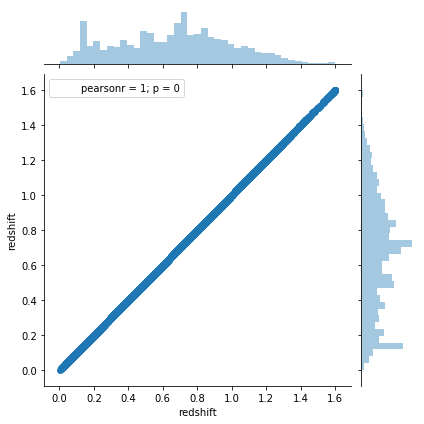

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


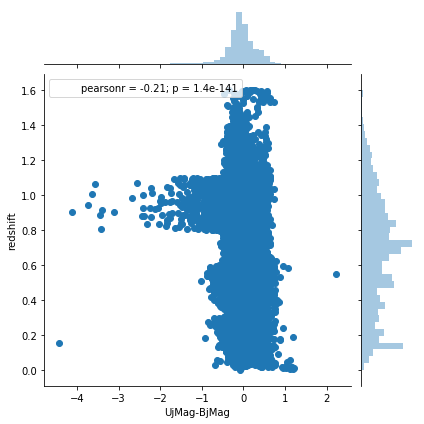

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


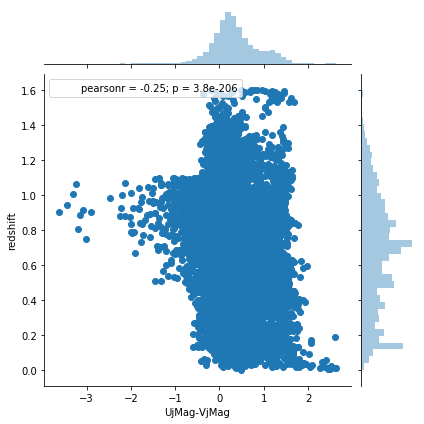

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


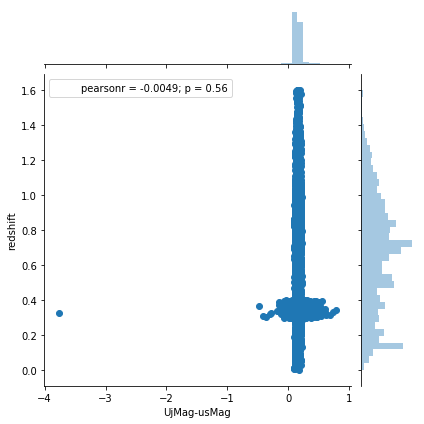

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


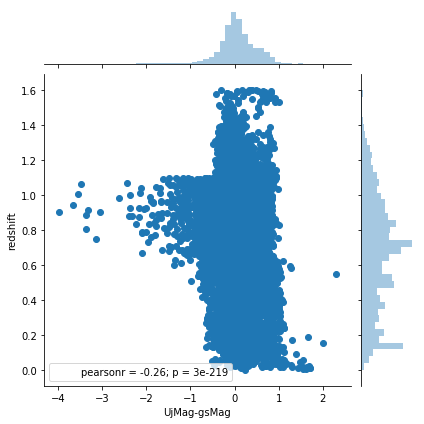

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


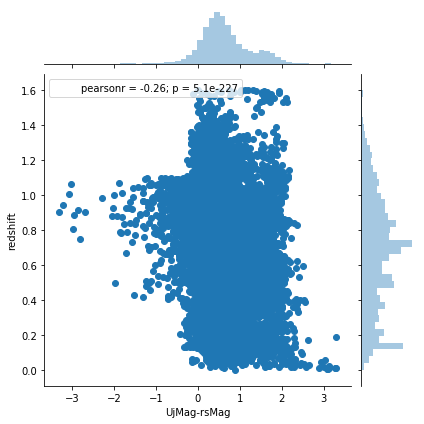

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


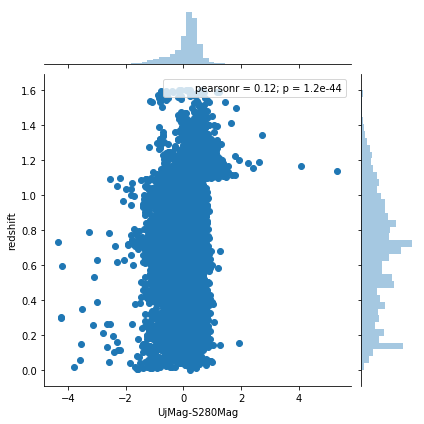

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


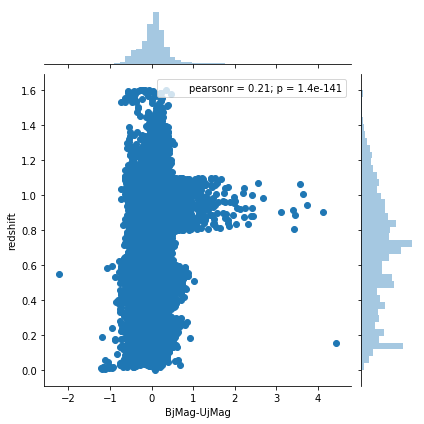

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


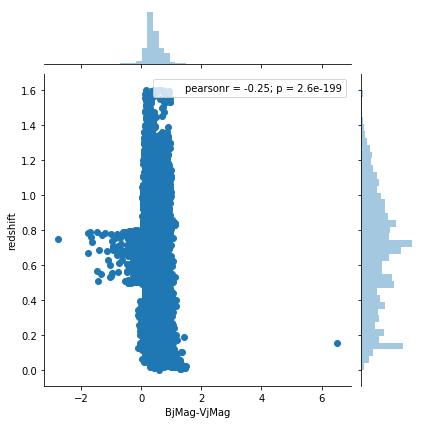

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


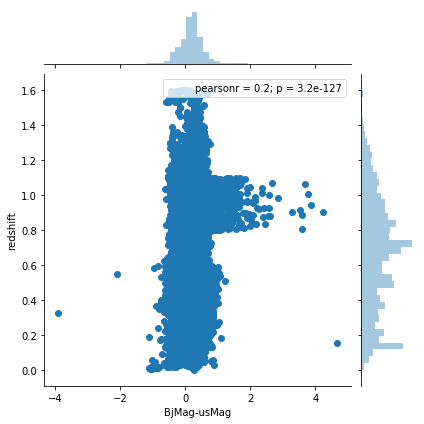

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


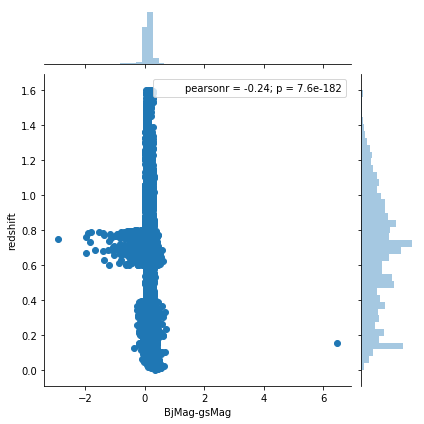

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


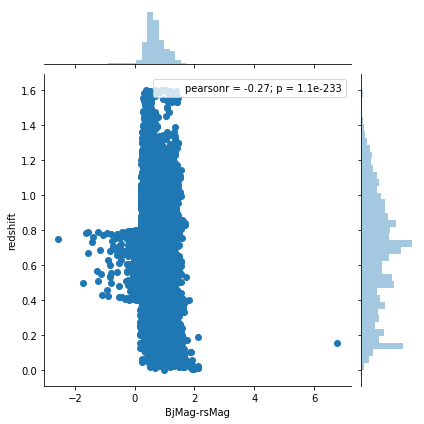

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


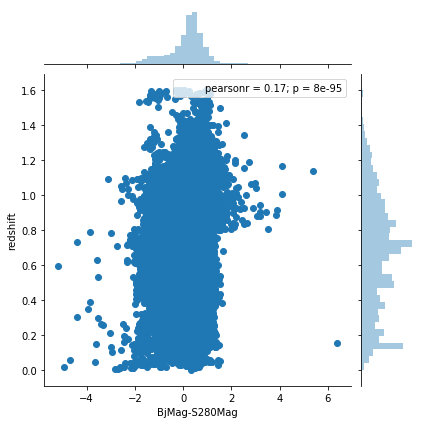

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


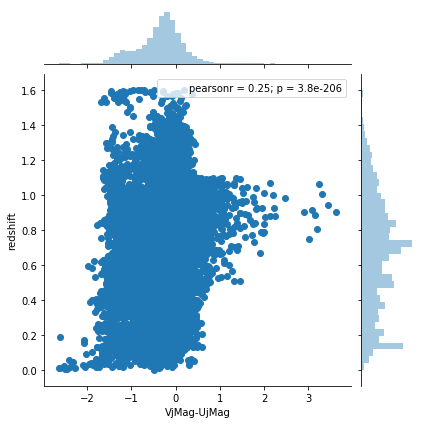

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


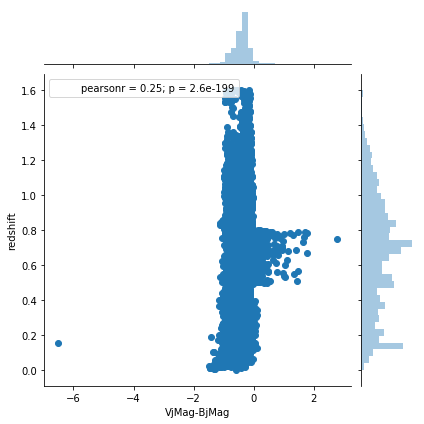

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


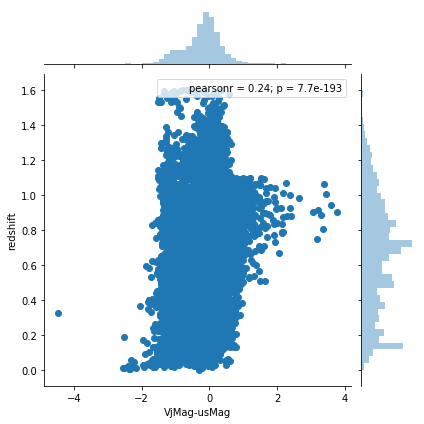

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


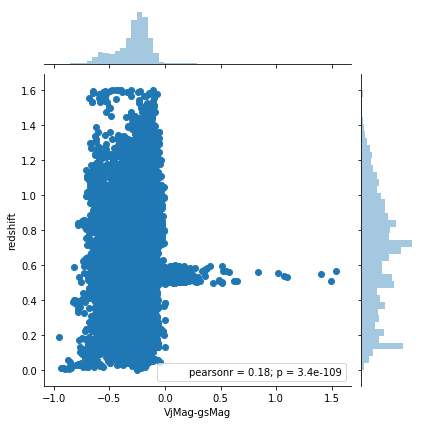

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


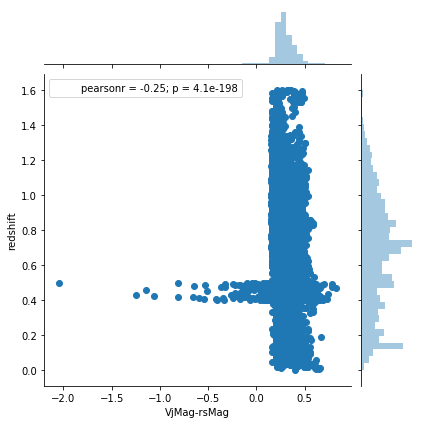

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


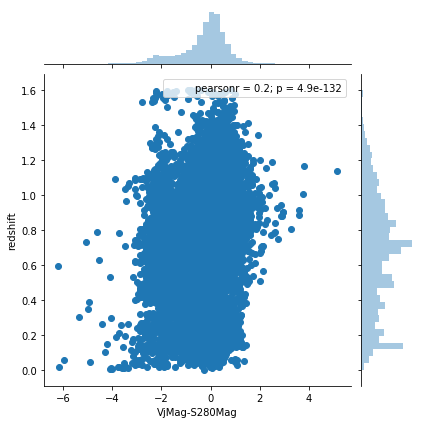

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


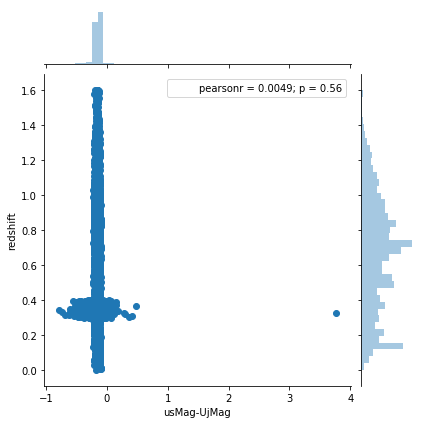

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


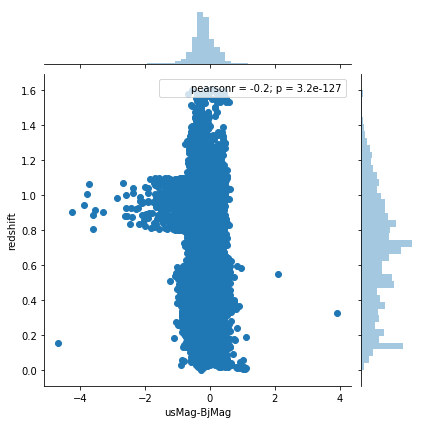

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


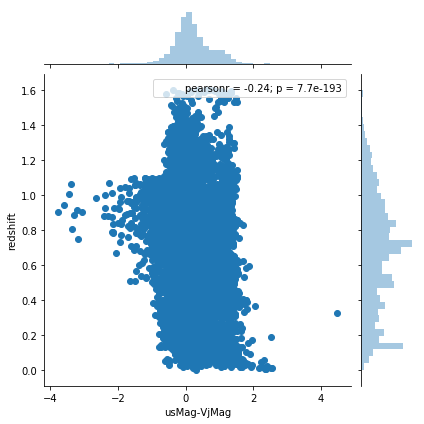

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


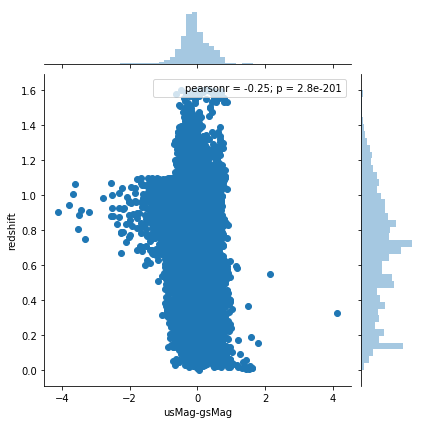

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


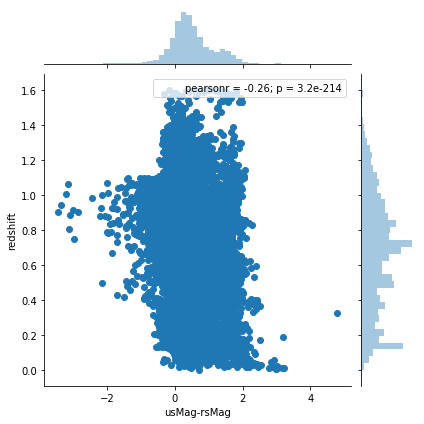

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


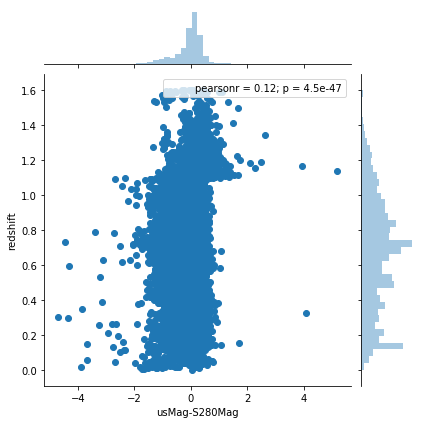

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


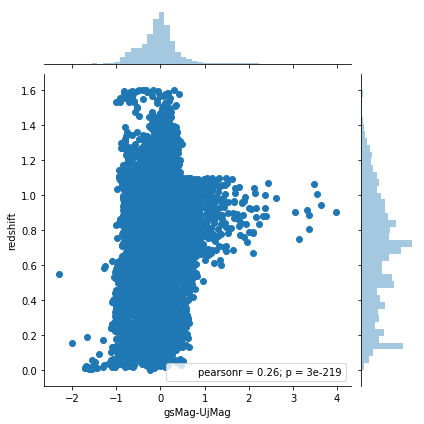

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


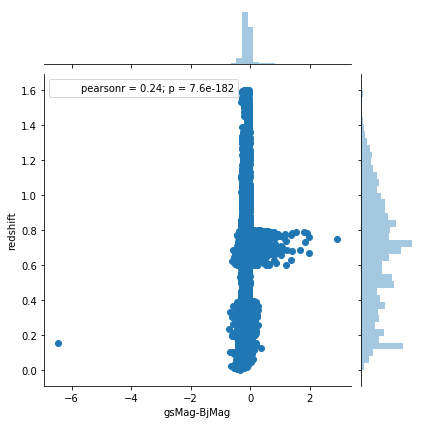

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


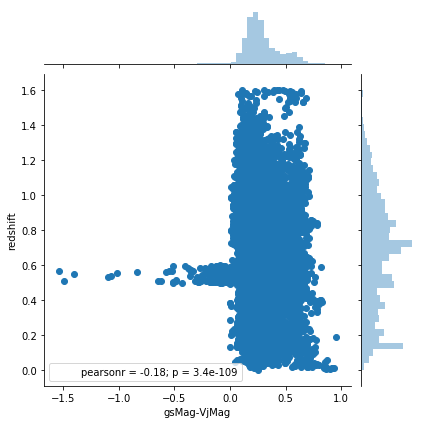

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


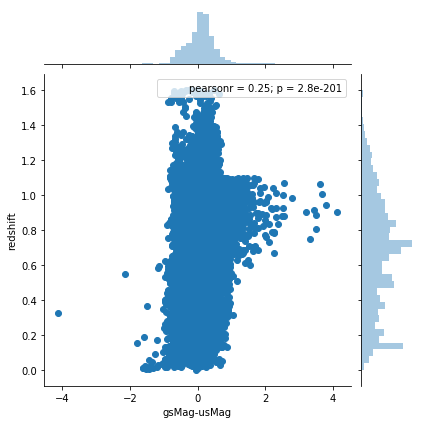

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


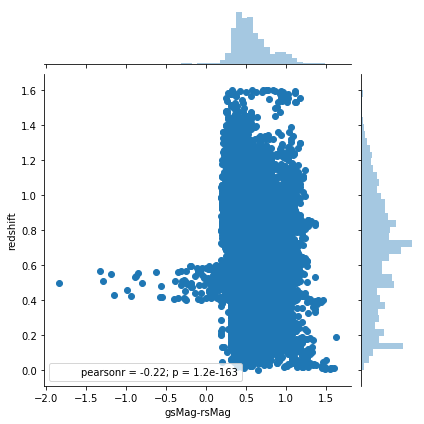

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


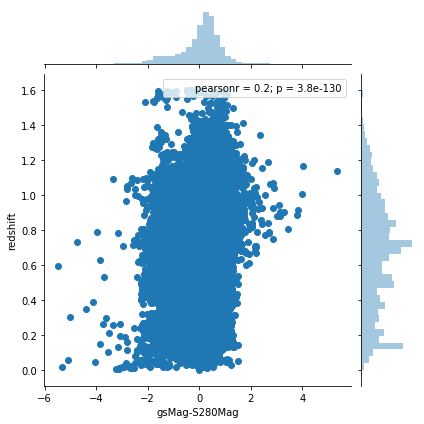

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


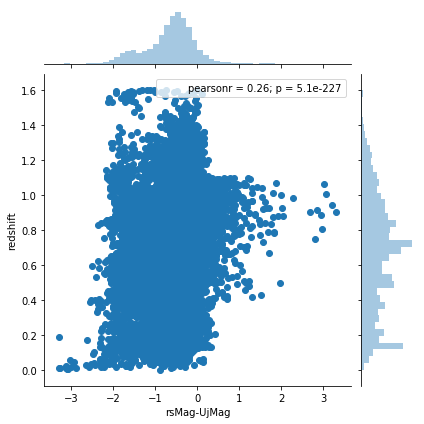

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


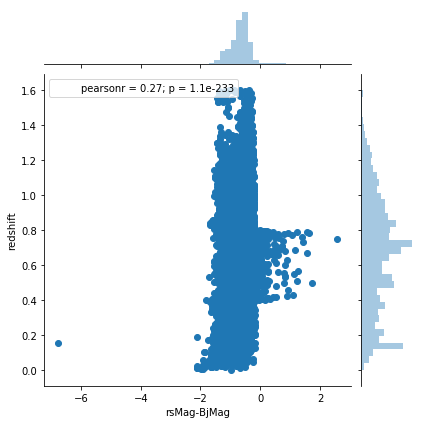

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


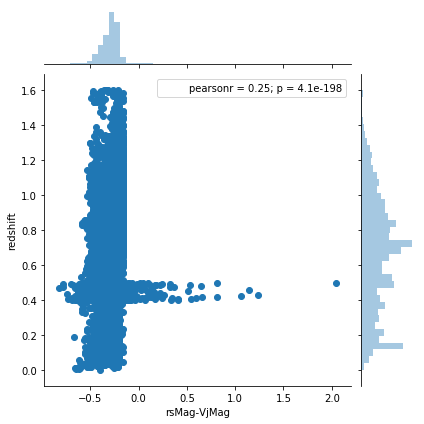

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


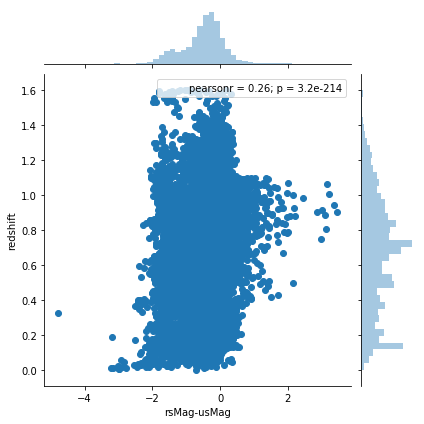

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


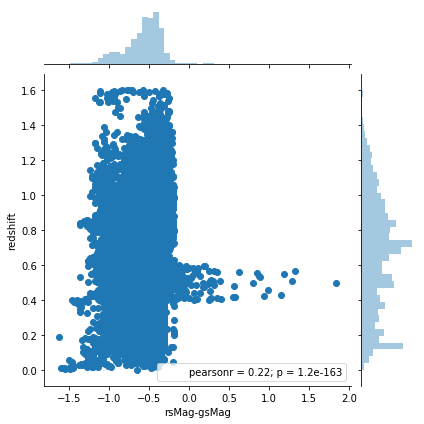

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


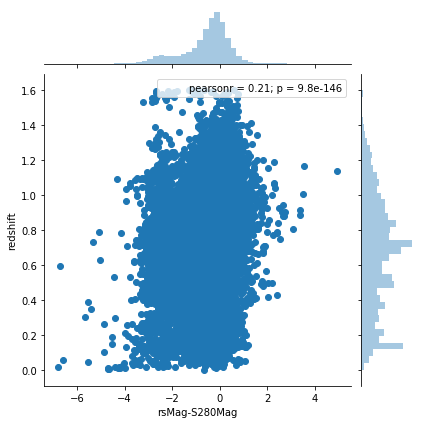

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


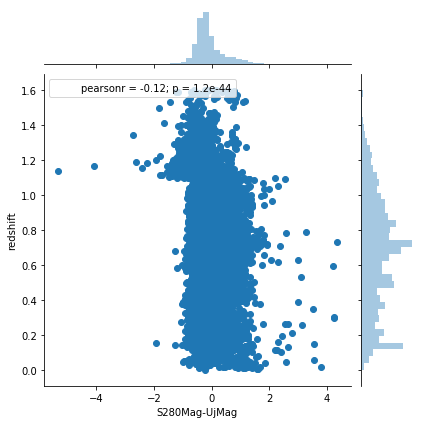

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


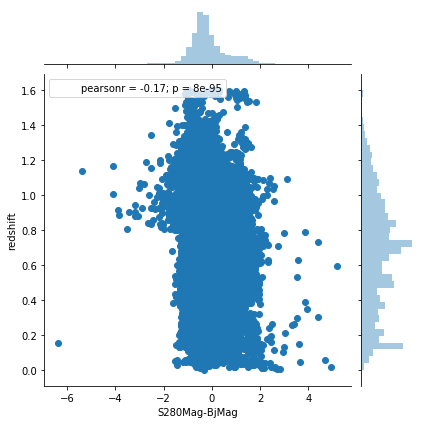

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


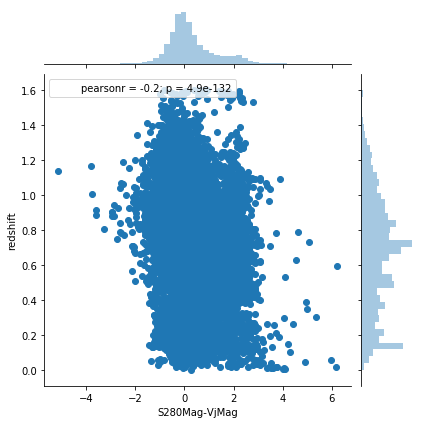

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


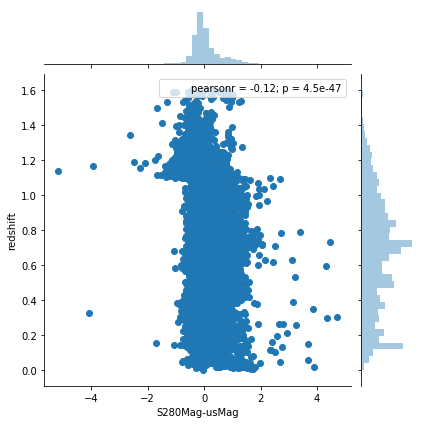

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


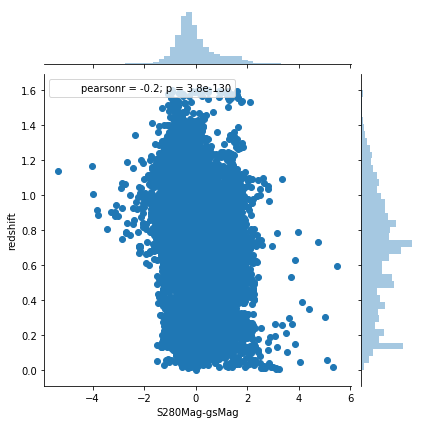

/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/maia/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


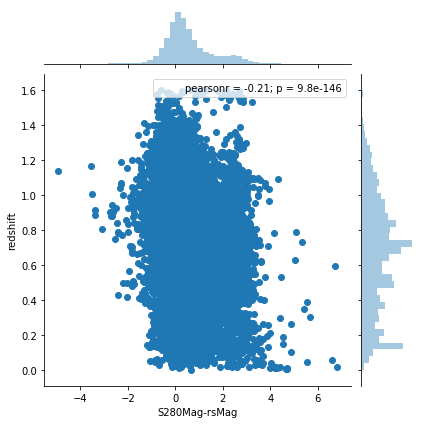

In [212]:
for column in magDiffs:
    sns.jointplot(x=column,y='redshift',data=magDiffs)    
    plt.show()

In [213]:
# drop duplicate flux columns from galaxies dataframe
# save galaxies dataset as a csv file
galaxies=galaxies.drop(columns=['W571F_S','e_W571F_S','W571F_D','e_W571F_D','W815F_S','e_W815F_S','W815F_G','e_W815F_G','W914F_E','e_W914F_E','UF_S','e_UF_S','UF_F','e_UF_F','BF_S','e_BF_S','BF_F','e_BF_F','RF_S','e_RF_S','RF_E','e_RF_E','RF_F','e_RF_F','RF_G','e_RF_G'])
galaxies = galaxies.dropna(subset=['W646F_D','W571F_E','W462F_E','W420F_E','S280Mag'])
galaxies.describe()

ra           dec             x             y          Rmag  \
count  14283.000000  14283.000000  14283.000000  14283.000000  14283.000000   
mean      53.103185    -27.812231   3996.985596   3822.684570     22.876991   
std        0.168712      0.144062   2257.907715   2179.422363      1.106667   
min       52.808610    -28.065162      2.755915      2.329053     10.765173   
25%       52.959550    -27.940175   2036.078308   1884.456543     22.422862   
50%       53.098921    -27.807209   4053.147217   3901.554688     23.217447   
75%       53.249622    -27.689810   5922.515137   5675.447510     23.680439   
max       53.401884    -27.564573   7929.382812   7562.461914     23.999872   

             e_Rmag       Ap_Rmag      ApD_Rmag        mu_max          MC_z  \
count  14283.000000  14283.000000  14283.000000  14283.000000  14283.000000   
mean       0.044602     23.299372     -0.480695     23.552008      0.660715   
std        0.026406      0.996280      0.513394      0.941021      0.328525   
min        0.000000     17.549747    -14.357697     17.722456      0.002813   
25%        0.023800     22.842113     -0.652856     23.133142      0.404561   
50%        0.043000     23.524193     -0.367838     23.745733      0.687348   
75%        0.061600     23.927406     -0.173506     24.170527      0.886551   
max        0.162300     27.370026      0.774403     25.797379      1.599780   

             e_MC_z       MC_z_ml       chi2red         UjMag       e_UjMag  \
count  14283.000000  14283.000000  14283.000000  14283.000000  14283.000000   
mean       0.096852      0.776109      1.269134    -18.515432      0.147874   
std        0.127295      0.503928      0.702048      1.923455      0.587412   
min        0.000262      0.000000      0.129306    -31.328515      0.100072   
25%        0.025350      0.417831      0.817441    -19.743293      0.106623   
50%        0.046710      0.705174      1.134658    -18.994874      0.117877   
75%        0.094712      0.980389      1.554113    -17.769092      0.139546   
max        0.960147      2.883013     13.657068     -5.340054     65.264145   

              BjMag       e_BjMag         VjMag       e_VjMag         usMag  \
count  14283.000000  14283.000000  14283.000000  14283.000000  14283.000000   
mean     -18.469470      0.200725    -18.872764      0.217972    -18.668385   
std        1.927691      1.245905      1.941073      1.004992      1.923275   
min      -31.395583      0.100037    -32.055682      0.100006    -31.461969   
25%      -19.712320      0.105233    -20.135760      0.109505    -19.893612   
50%      -18.890479      0.120750    -19.233557      0.138117    -19.147485   
75%      -17.702023      0.172391    -18.020602      0.212125    -17.922848   
max       -5.250331     88.907875     -5.834827     86.272079     -5.520545   

            e_usMag         gsMag       e_gsMag         rsMag       e_rsMag  \
count  14283.000000  14283.000000  14283.000000  14283.000000  14283.000000   
mean       0.148902    -18.584857      0.210539    -19.163124      0.223603   
std        0.596859      1.915595      1.004228      1.950311      1.005841   
min        0.100072    -31.761922      0.100006    -32.328855      0.100006   
25%        0.106660    -19.830444      0.106631    -20.432413      0.112014   
50%        0.117924    -18.988518      0.129134    -19.501160      0.144694   
75%        0.139724    -17.772651      0.201996    -18.298847      0.218414   
max       65.264145     -5.582446     86.272079     -6.235617     86.272079   

            S280Mag     e_S280Mag       W420F_E     e_W420F_E       W462F_E  \
count  14283.000000  14283.000000  14283.000000  14283.000000  14283.000000   
mean     -18.611132      0.192622      0.027612      0.003745      0.041034   
std        1.960478      0.519188      0.050961      0.001699      0.098724   
min      -27.869558      0.100193     -0.030357      0.002589     -0.033697   
25%      -19.908291      0.116232      0.010426      0.003091 

In [214]:
galaxies.to_csv('galaxies.csv')